# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.2'

## Specifying filetype, and folder as before

In [21]:
# This specifies what file type your Raman exported in. 
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [22]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong'). After selecting one, go through and select another one and run again from here. 
batch='Medium' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')
if batch=='Std':
    GroupN_df=joblib.load('Std_df.sav')

GroupN_df

filename  rays_present  \
0   09 187-1-126-reg1-A--Spectrum--015--Spec.Data ...           1.0   
1   13 187-1-126-reg1-E--Spectrum--028--Spec.Data ...           0.0   
2   14 187-1-126-reg1-F--Spectrum--031--Spec.Data ...           0.0   
3   16 187-1-126-reg1-G--Spectrum--035--Spec.Data ...           1.0   
4   18 187-1-126-reg1-H--Spectrum--039--Spec.Data ...           0.0   
5   19 187-1-126-reg1-I--Spectrum--042--Spec.Data ...           1.0   
6   20 187-1-126-reg1-J--Spectrum--045--Spec.Data ...           0.0   
7   25 187-1-126-reg3-A--Spectrum--058--Spec.Data ...           0.0   
8   30 187-1-126-reg4-A--Spectrum--072--Spec.Data ...           1.0   
9   33 187-1-126-reg4-C--Spectrum--079--Spec.Data ...           0.0   
10  35 187-1-126-reg5-A--Spectrum--083--Spec.Data ...           1.0   
11  38 187-1-126-reg5-B--Spectrum--089--Spec.Data ...           0.0   

    approx_split    Diad1_pos    Diad2_pos  HB1_pos      HB2_pos  C13_pos  \
0     103.898754  1284.143917  1388.042671      NaN          NaN      NaN   
1     103.893254  1284.138418  1388.031672      NaN  1409.370184      NaN   
2     103.915253  1284.110920  1388.026173      NaN  1409.463678      NaN   
3     103.722766  1284.363902  1388.086668      NaN  1409.694661      NaN   
4     103.997747  1283.962430  1387.960177      NaN  1409.667163      NaN   
5     103.876756  1284.165916  1388.042671      NaN  1409.656164      NaN   
6     103.854757  1284.242910  1388.097668      NaN  1409.782655      NaN   
7     103.695268  1284.732376  1388.427645      NaN  1409.826652      NaN   
8     103.618274  1284.825870  1388.444143      NaN          NaN      NaN   
9     103.711767  1284.523391  1388.235158      NaN  1409.463678      NaN   
10    103.959250  1284.099920  1388.059170      NaN  1409.337186      NaN   
11    103.777763  1284.336404  1388.114167      NaN  1409.436180      NaN   

    Diad1_abs_prom  Diad2_abs_prom  ...  HB2_height  C13_height  Diad1_height  \
0       279.719337      577.581651  ...         NaN         NaN    957.519325   
1       463.234225      980.911365  ...  721.312824         NaN   1128.234225   
2       381.231926      831.681023  ...  712.217478         NaN   1045.931908   
3       320.450026      653.709095  ...  705.745980         NaN    986.550032   
4       451.257689      987.549757  ...  716.817047         NaN   1115.557677   
5       443.551159      965.144556  ...  720.172620         NaN   1108.351177   
6       257.372220      541.522099  ...  694.246999         NaN    919.572232   
7       288.099990      559.698317  ...  700.687962         NaN    953.299972   
8       247.780193      486.057393  ...         NaN         NaN    916.480174   
9       345.086474      715.589059  ...  718.453468         NaN   1019.886462   
10      417.628568      874.177475  ...  723.763773         NaN   1091.728544   
11      330.234259      694.770973  ...  701.808573         NaN    994.034246   

    HB1_height  Diad1_Median_Bck  Diad2_Median_Bck  C13_HB2_abs_prom_ratio  \
0          NaN        677.799988        678.500000                     NaN   
1          NaN        665.000000        665.100006                     NaN   
2          NaN        664.699982        664.149979                     NaN   
3          NaN        666.100006        665.800018                     NaN   
4          NaN        664.299988        664.050003                     NaN   
5          NaN        664.800018        664.350006                     NaN   
6          NaN        662.200012        661.750015                     NaN   
7          NaN        665.199982        664.299988                     NaN   
8          NaN        668.699982        668.249985                     NaN   
9          NaN        674.799988        674.249985                     NaN   
10         NaN        674.099976        674.149979                     NaN   
11         NaN        663.799988        663.399994                     NaN   

    Diad2_HB2_Valley_prom  HB1_prom/std_betweendia

### Now load one file from this group to tweak parameters for

In [23]:
Diad_Files =GroupN_df['filename']
i=0


### Lets plot the diad to have a look at it

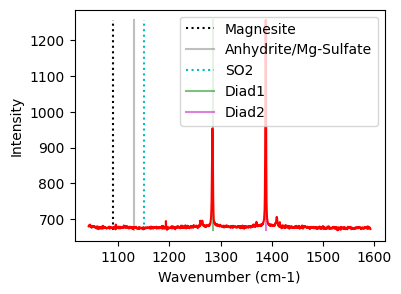

In [24]:
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [25]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [26]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

# FG04 Standards
if batch=='Std':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init


if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240), upper_bck_diad1=(1315, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=279.7193370194585, HB_prom=nan, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1284.091192       1284.091192        0.009973        816.464586   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma  Diad1_Combofit_Height  \
0           1.057231                  0             280.486419   

   Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm        Diad1_refit  \
0        2.828347        0.703525    2.114462  Flagged Warnings:   

   Diad1_Asym50  Diad1_Asym70  Diad1_Yuan2017_sym_factor  \
0      1.147458      1.142163                   0.311794   

   Diad1_Remigi2021_BSF   Diad1_PDF_Model  
0              0.007539  PseudoVoigtModel

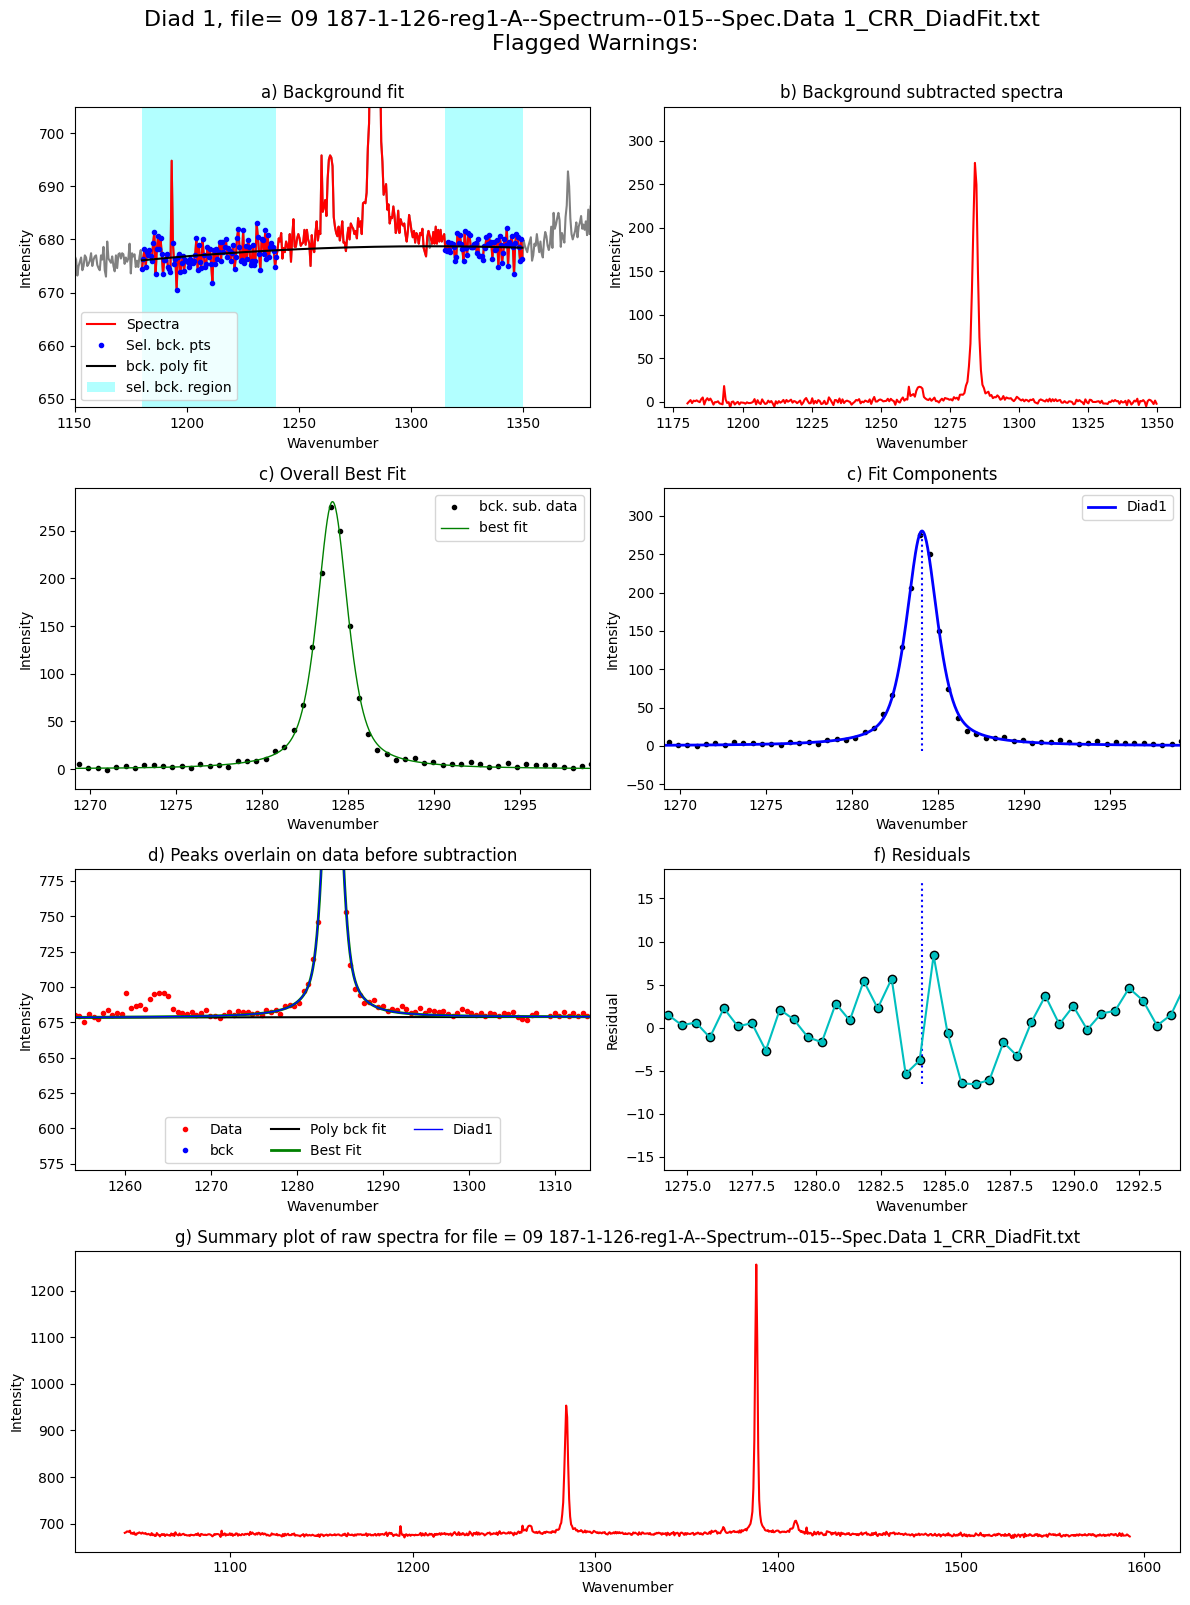

In [27]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=spectra_filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [28]:
diad1_fit_config2=diad1_fit_config_init

## Fit diad2

In [29]:
if batch=='Std':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init


if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=False, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=3, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1350), upper_bck_diad2=(1440, 1470), fit_gauss=False, gauss_amp=nan, diad_sigma=1, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=577.581651385618, HB_prom=nan, C13_prom=nan, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

### See what these fit parameters look like for diad2

/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1388.024118       1388.024118        0.005751       1282.643809   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma  Diad2_Combofit_Height  \
0           0.796003                  0             579.733442   

   Diad2_Residual  Diad2_Prop_Lor  Diad2_fwhm        Diad2_refit  \
0        3.919523        0.726106    1.592005  Flagged Warnings:   

   Diad2_Asym50  Diad2_Asym70  Diad2_Yuan2017_sym_factor  \
0      1.034335      1.081123                   0.054661   

   Diad2_Remigi2021_BSF   Diad2_PDF_Model  
0              0.002746  PseudoVoigtModel

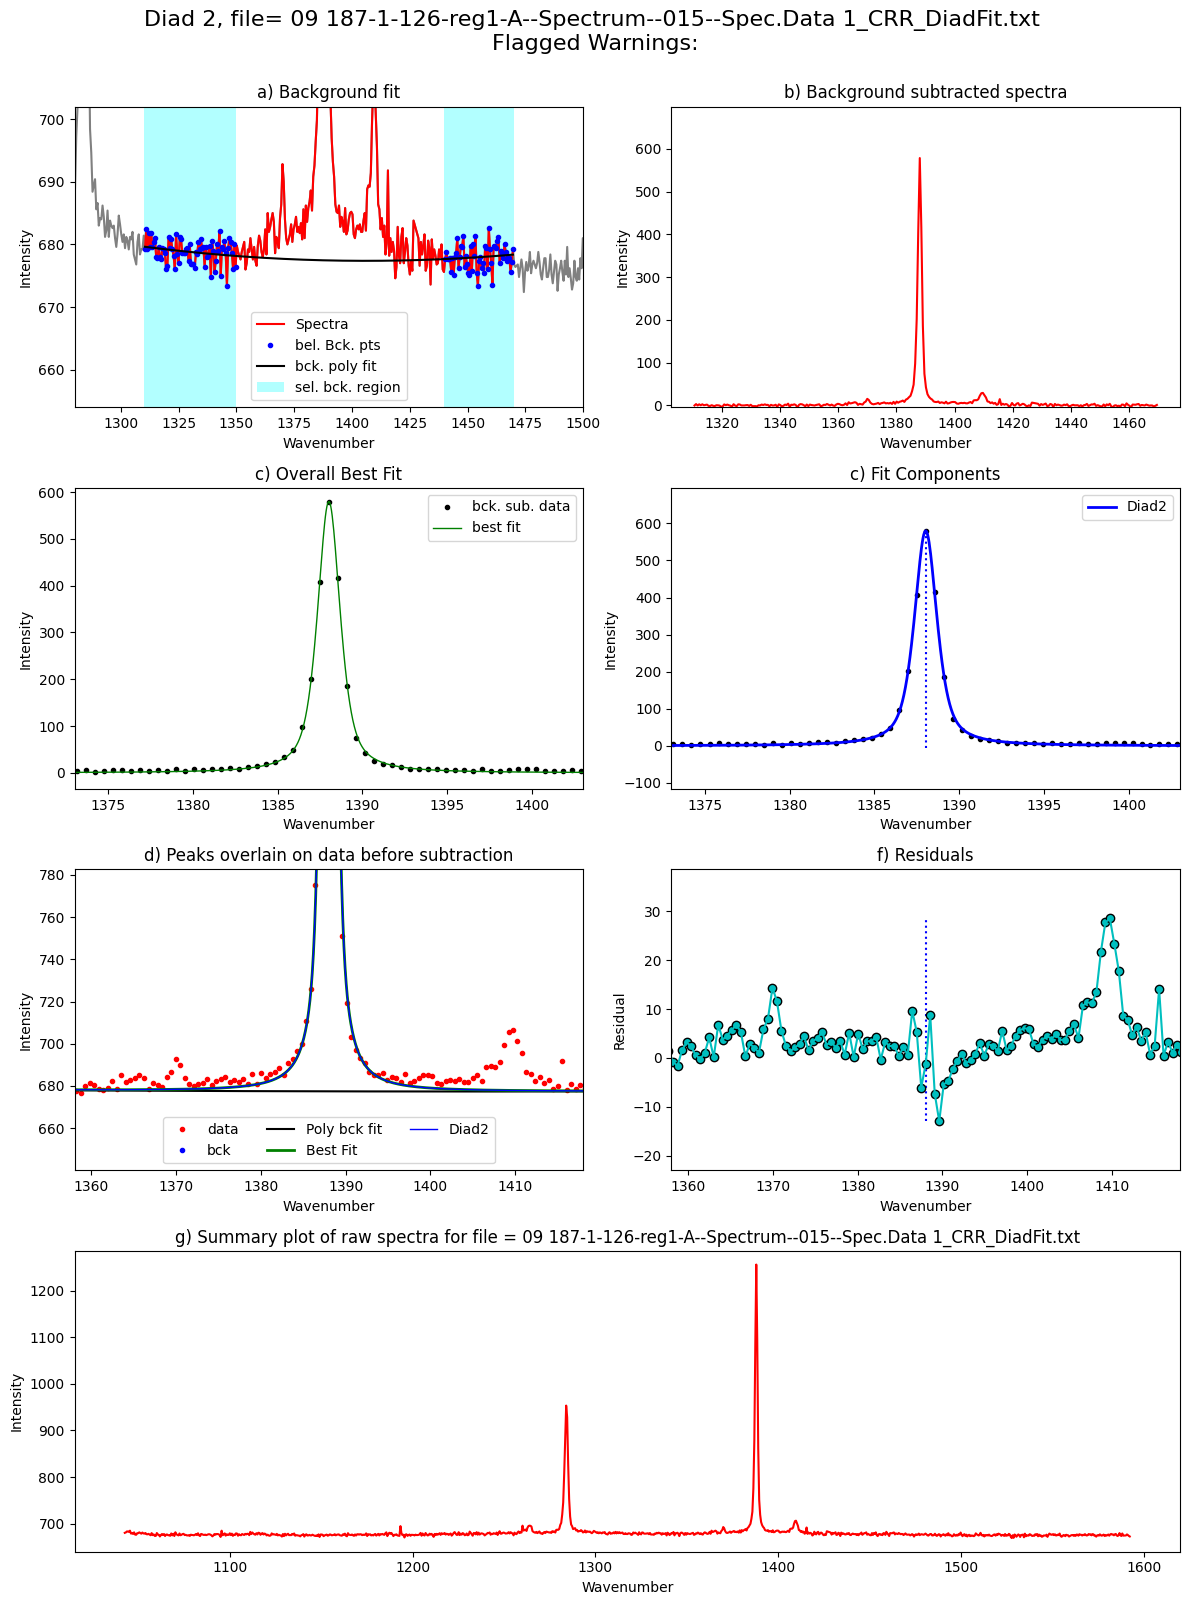

In [30]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/12 [00:00<?, ?it/s]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 09 187-1-126-reg1-A--Spectrum--015--Spec.Data 1_CRR_DiadFit.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
  8%|▊         | 1/12 [00:01<00:14,  1.29s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 13 187-1-126-reg1-E--Spectrum--028--Spec.Data 1.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 17%|█▋        | 2/12 [00:02<00:13,  1.30s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 14 187-1-126-reg1-F--Spectrum--031--Spec.Data 1.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 25%|██▌       | 3/12 [00:03<00:11,  1.28s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 16 187-1-126-reg1-G--Spectrum--035--Spec.Data 1_CRR_DiadFit.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 33%|███▎      | 4/12 [00:05<00:10,  1.30s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 18 187-1-126-reg1-H--Spectrum--039--Spec.Data 1.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 42%|████▏     | 5/12 [00:06<00:09,  1.29s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 19 187-1-126-reg1-I--Spectrum--042--Spec.Data 1_CRR_DiadFit.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 50%|█████     | 6/12 [00:07<00:07,  1.31s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 20 187-1-126-reg1-J--Spectrum--045--Spec.Data 1.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 58%|█████▊    | 7/12 [00:09<00:06,  1.30s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 25 187-1-126-reg3-A--Spectrum--058--Spec.Data 1.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 67%|██████▋   | 8/12 [00:10<00:05,  1.32s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 30 187-1-126-reg4-A--Spectrum--072--Spec.Data 1_CRR_DiadFit.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 75%|███████▌  | 9/12 [00:11<00:03,  1.29s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 33 187-1-126-reg4-C--Spectrum--079--Spec.Data 1.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 83%|████████▎ | 10/12 [00:12<00:02,  1.28s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:3218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and

Processing file: 35 187-1-126-reg5-A--Spectrum--083--Spec.Data 1_CRR_DiadFit.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 92%|█████████▏| 11/12 [00:14<00:01,  1.30s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 38 187-1-126-reg5-B--Spectrum--089--Spec.Data 1.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
100%|██████████| 12/12 [00:15<00:00,  1.30s/it]


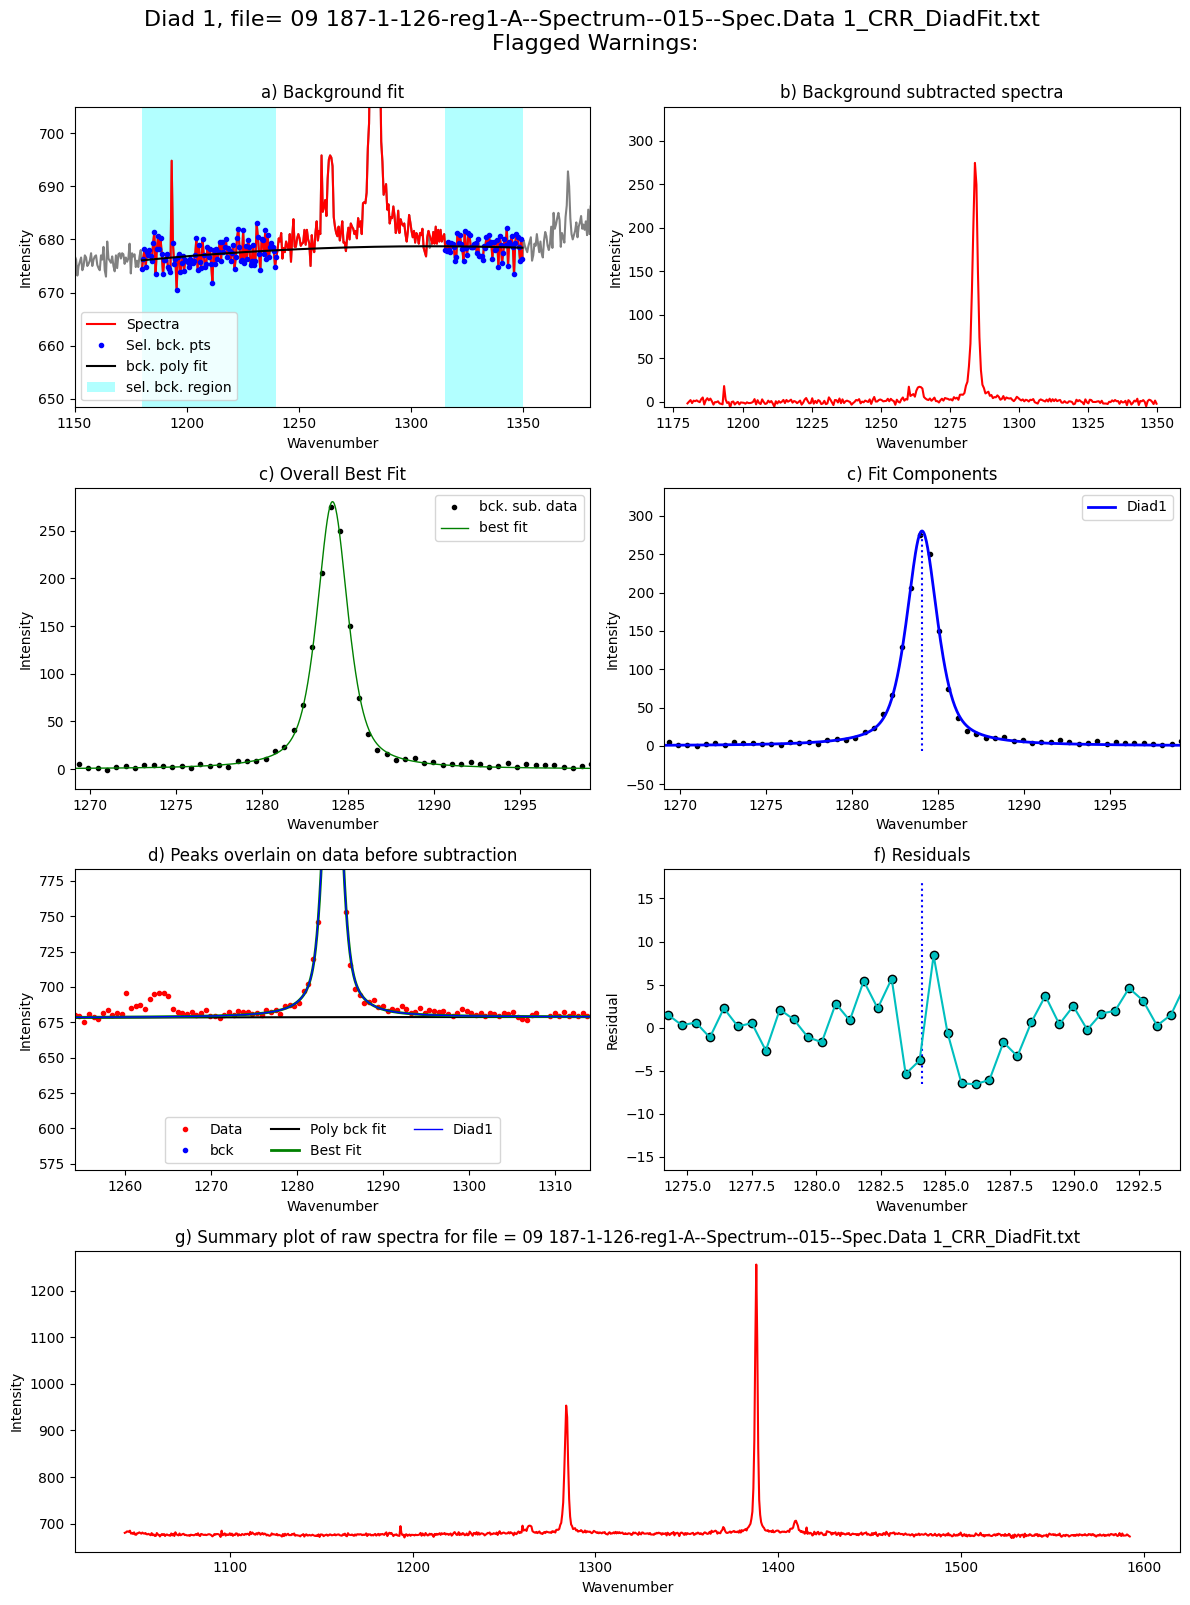

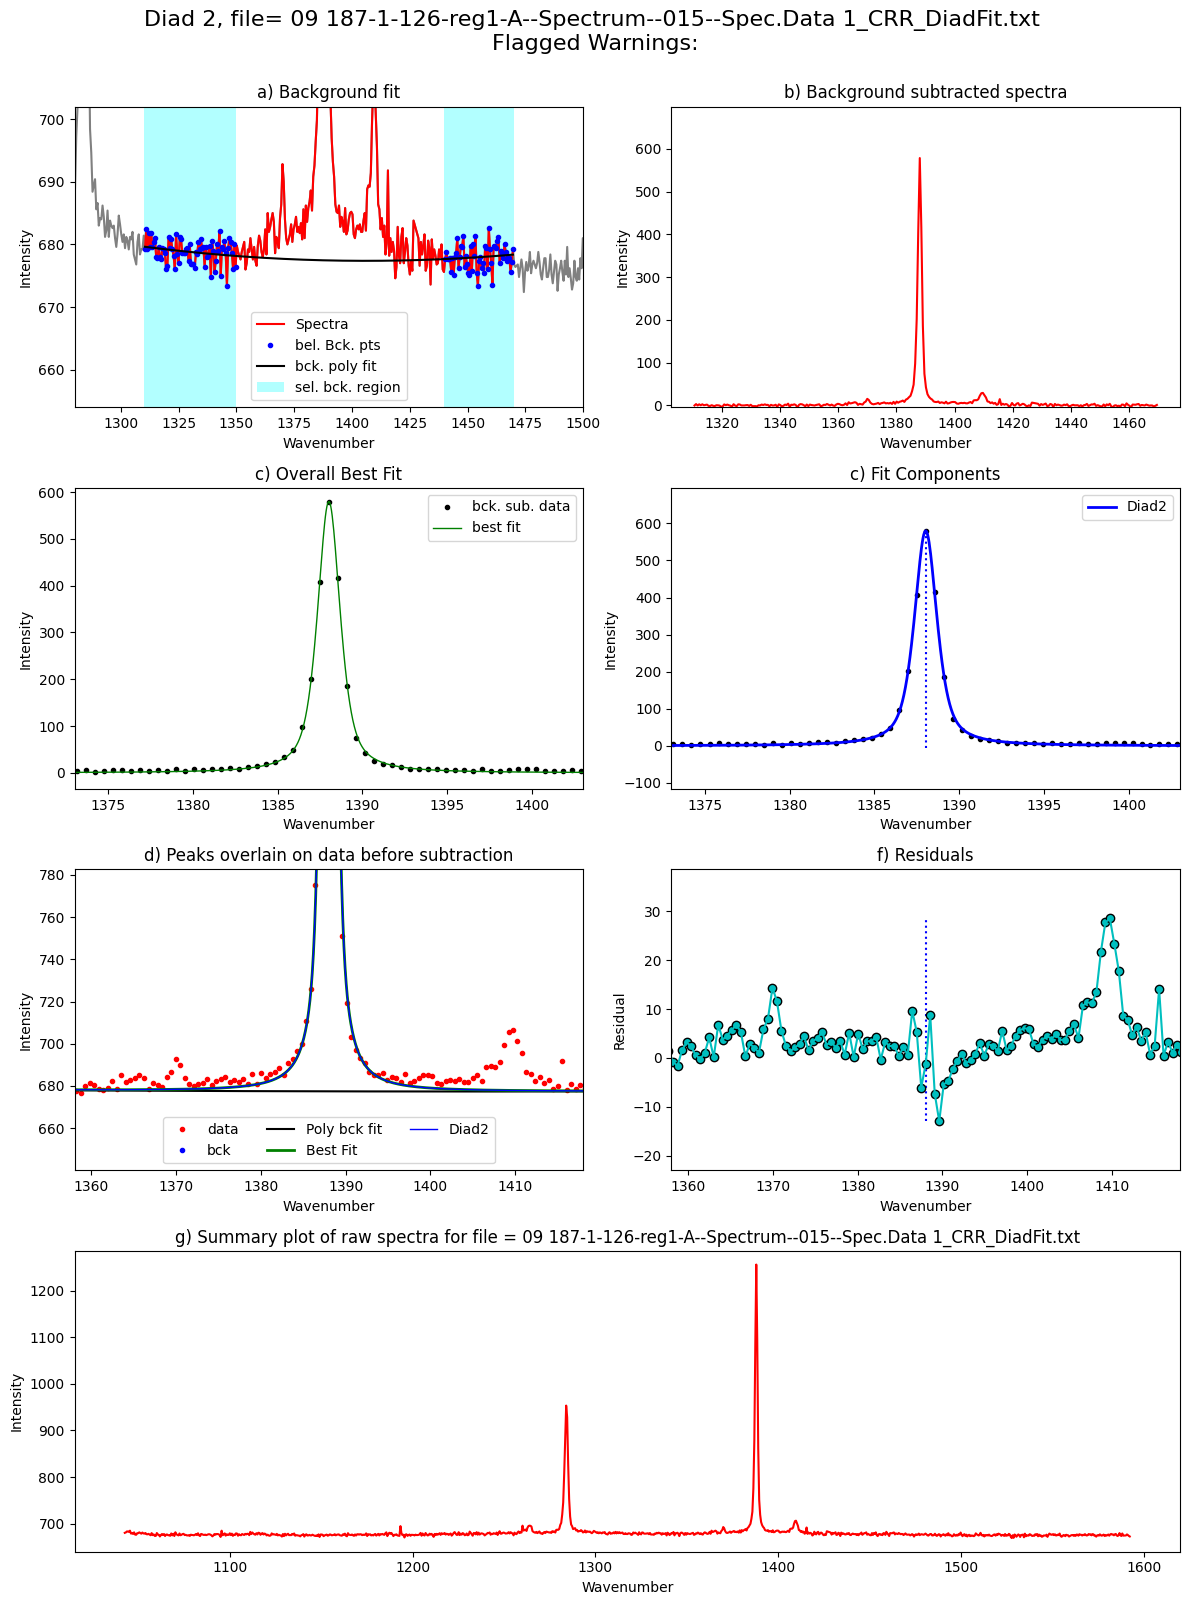

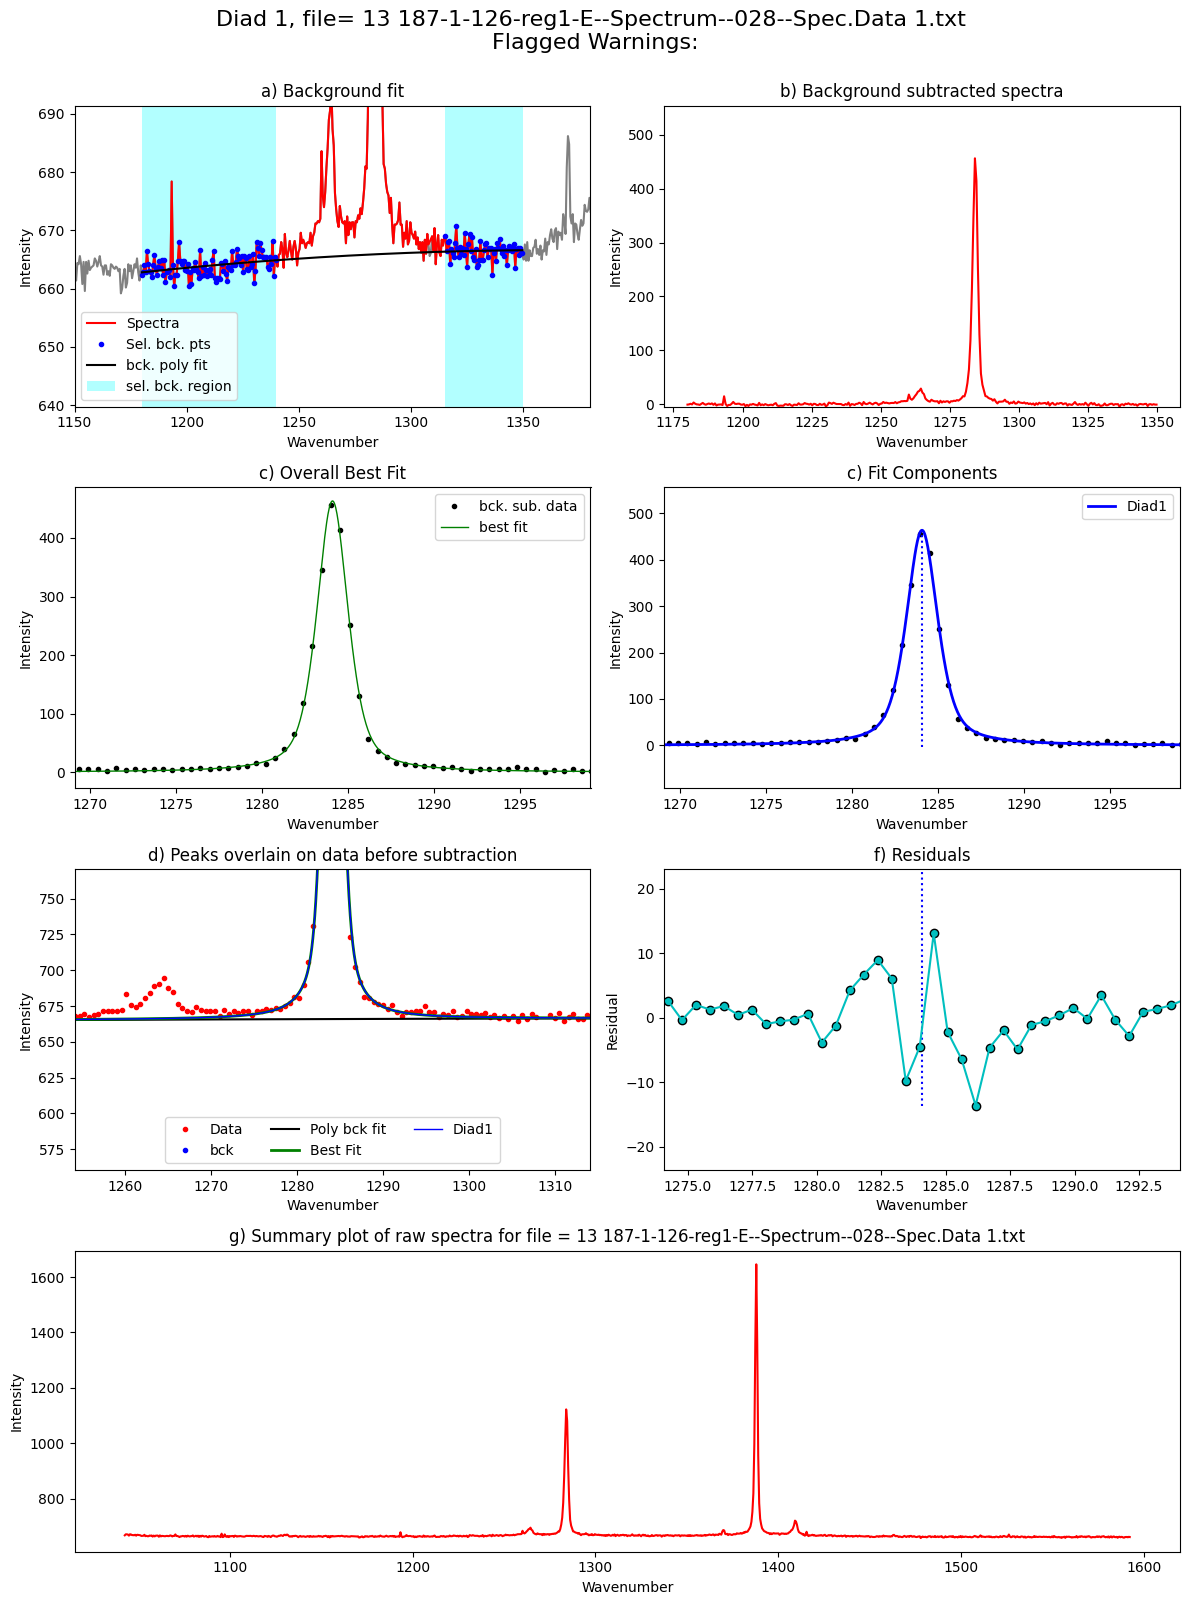

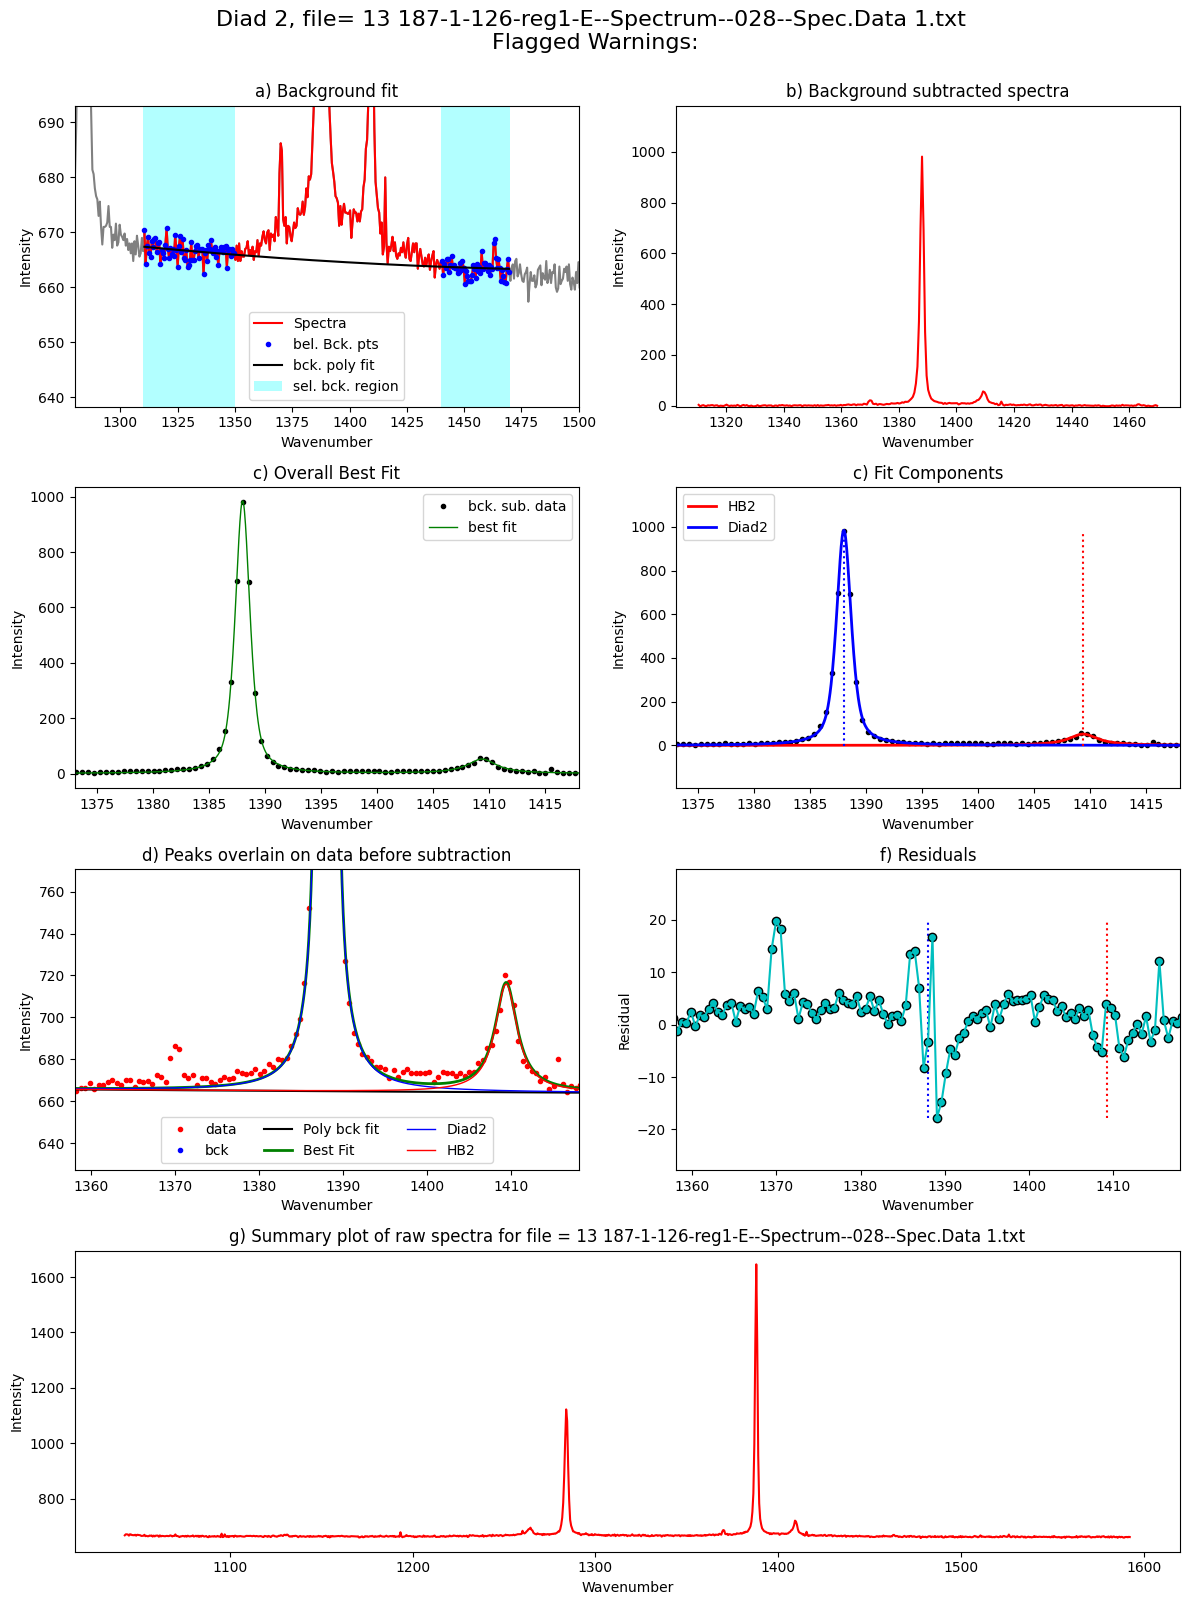

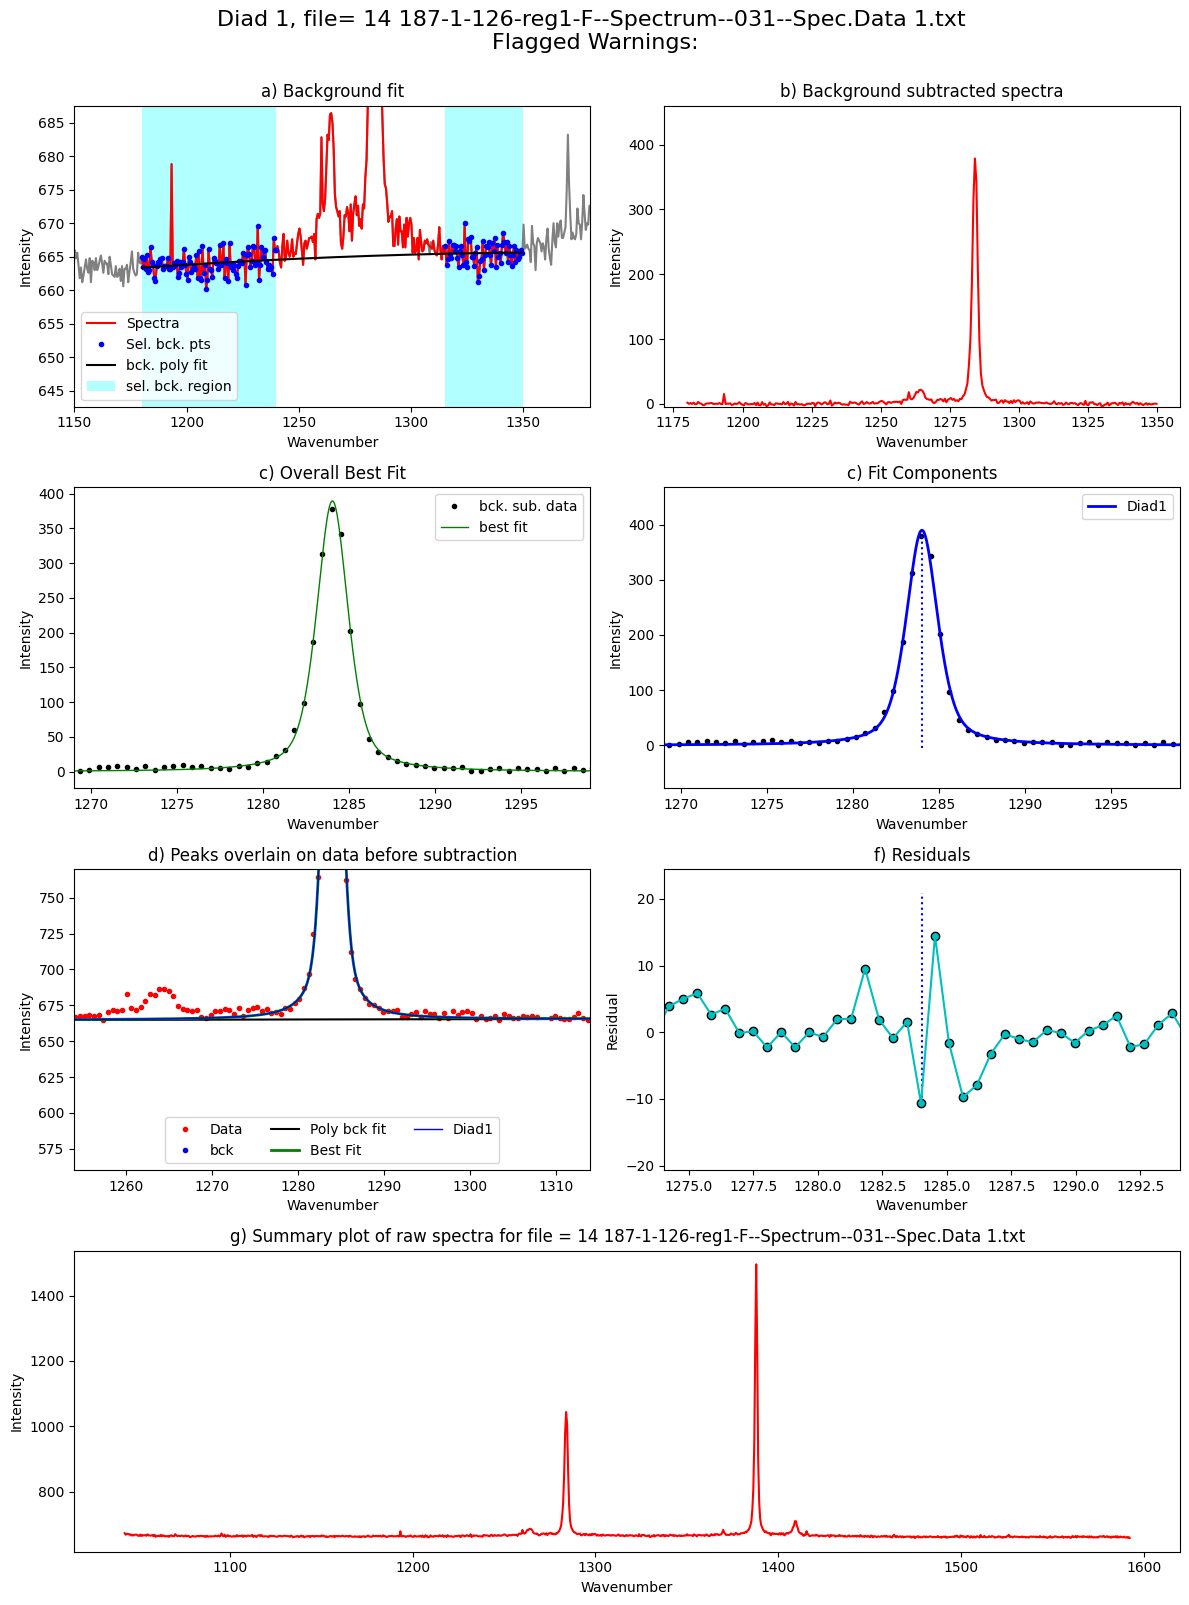

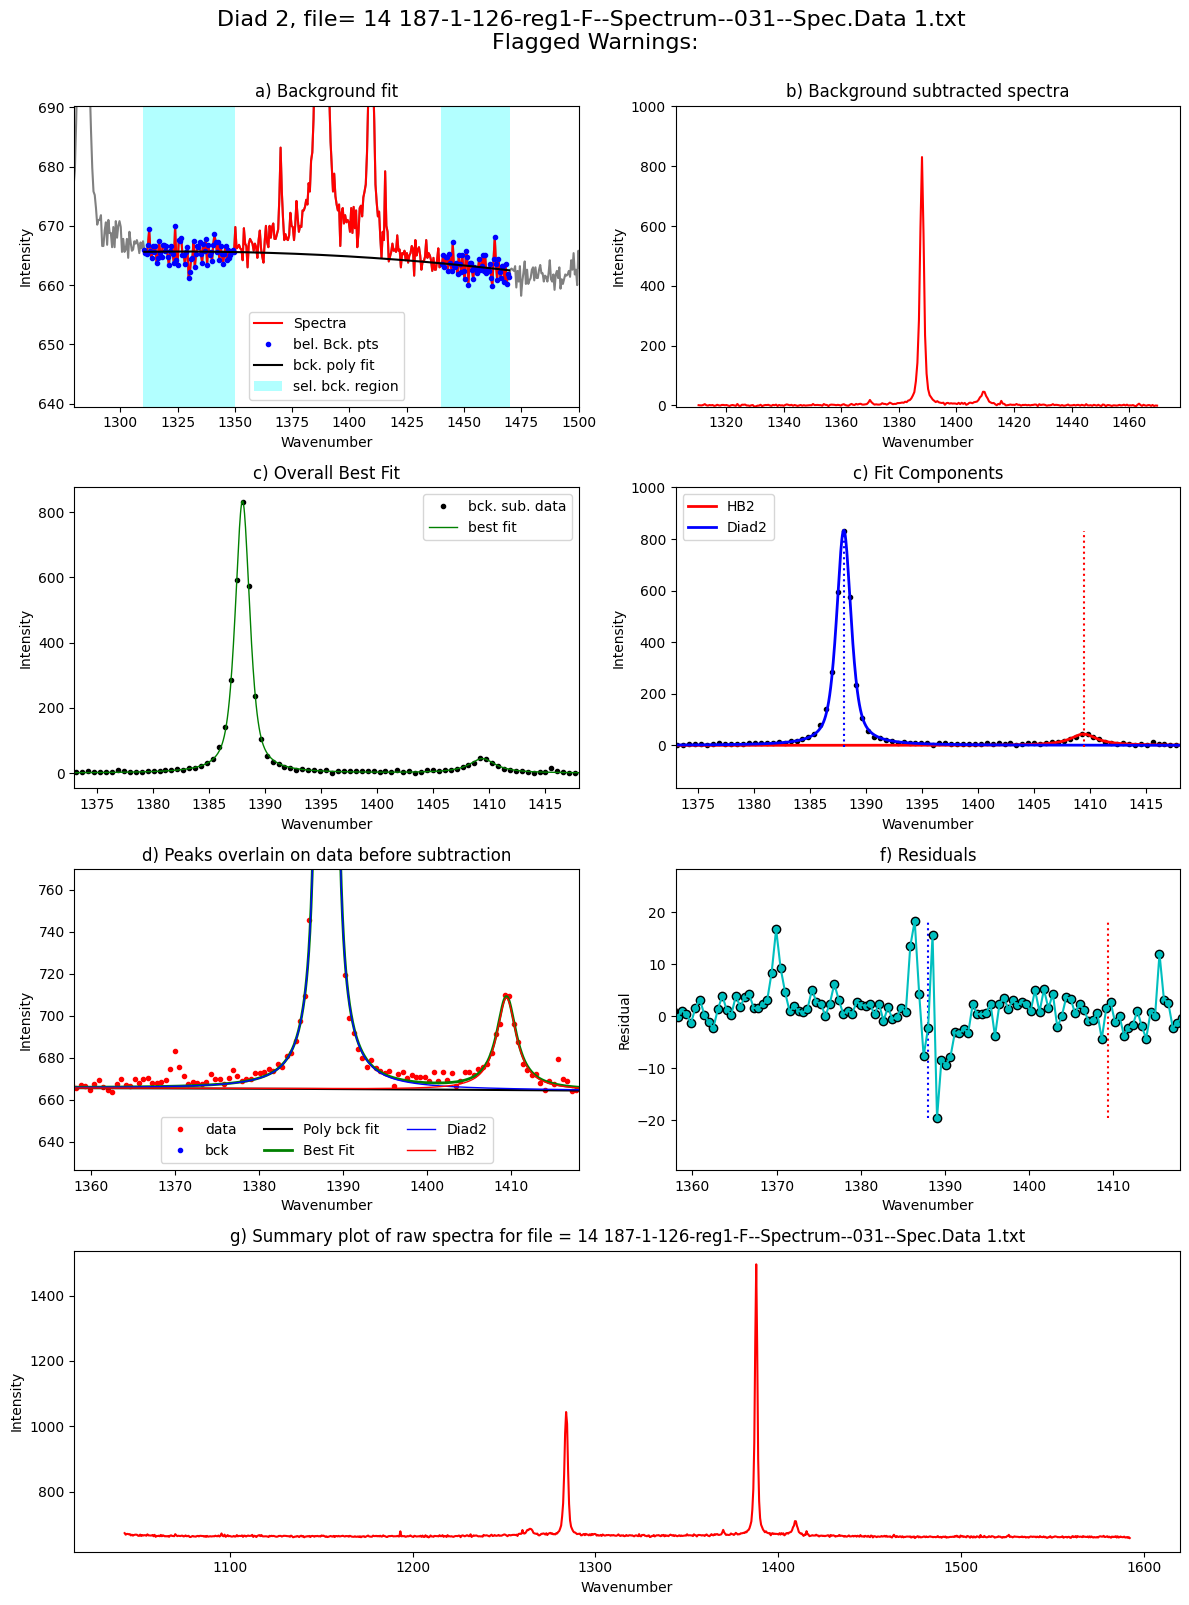

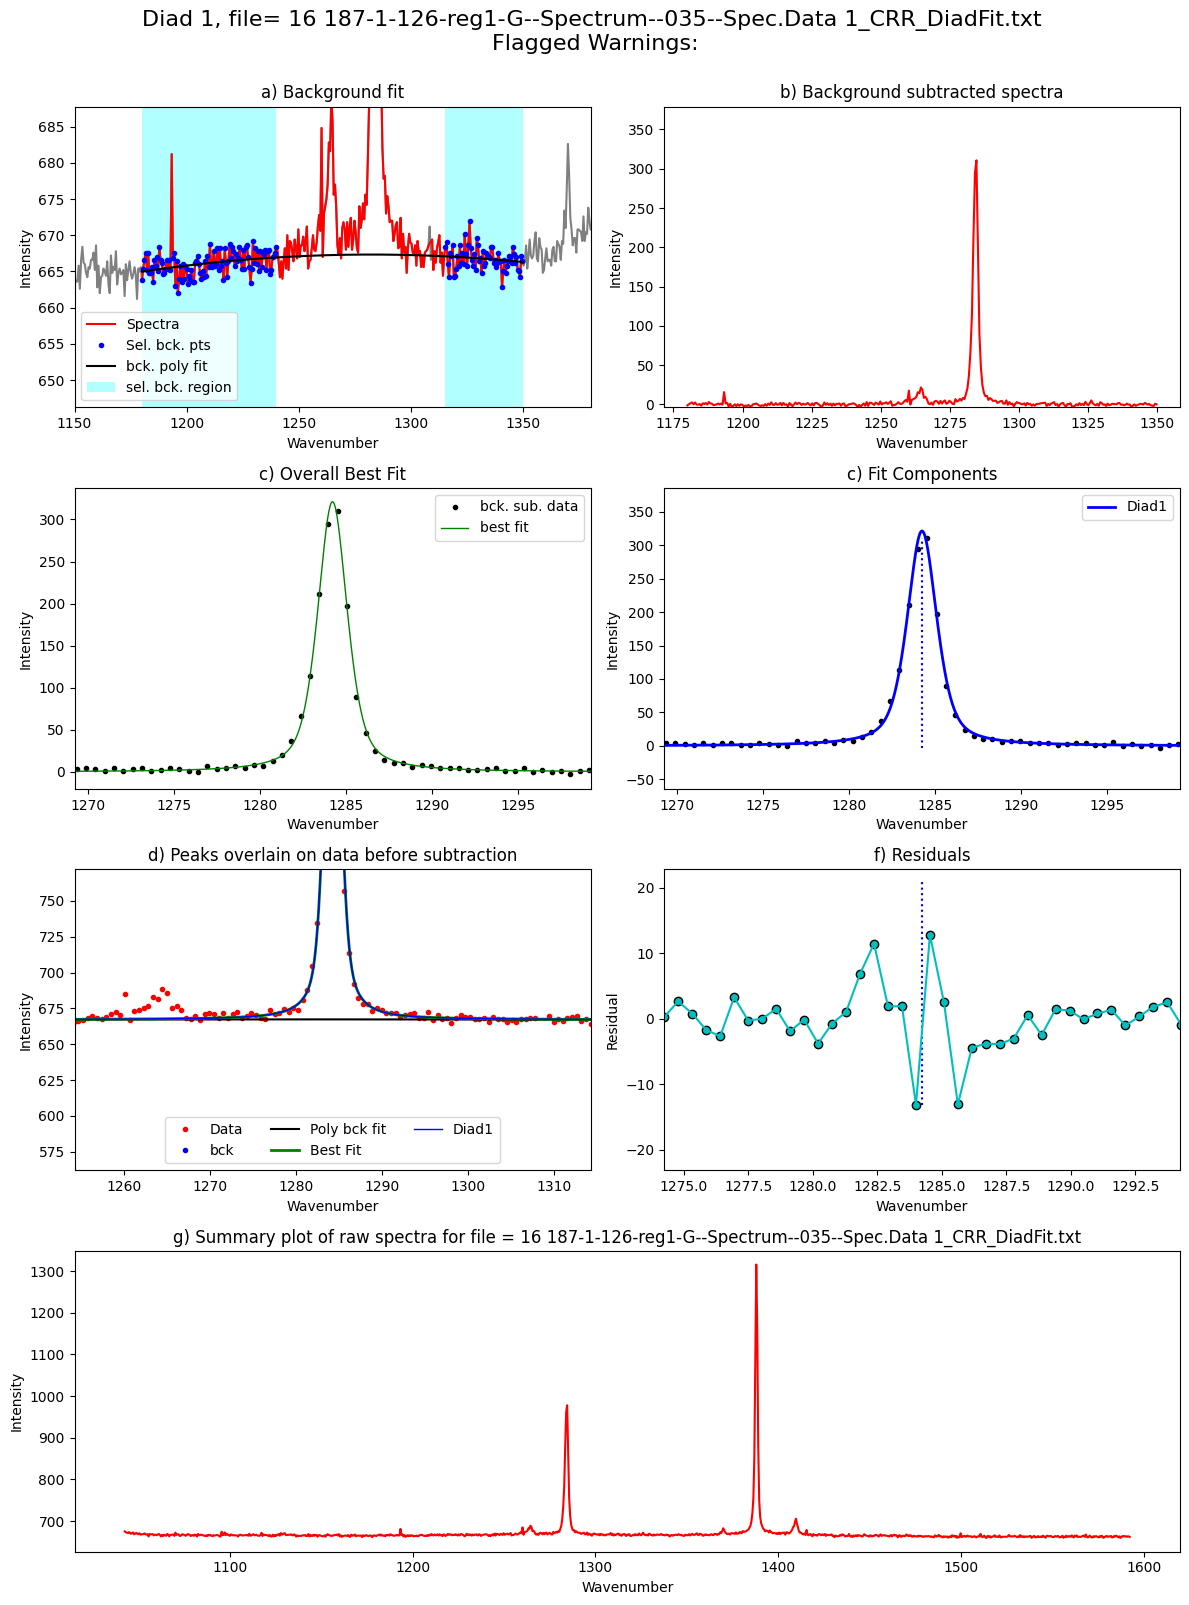

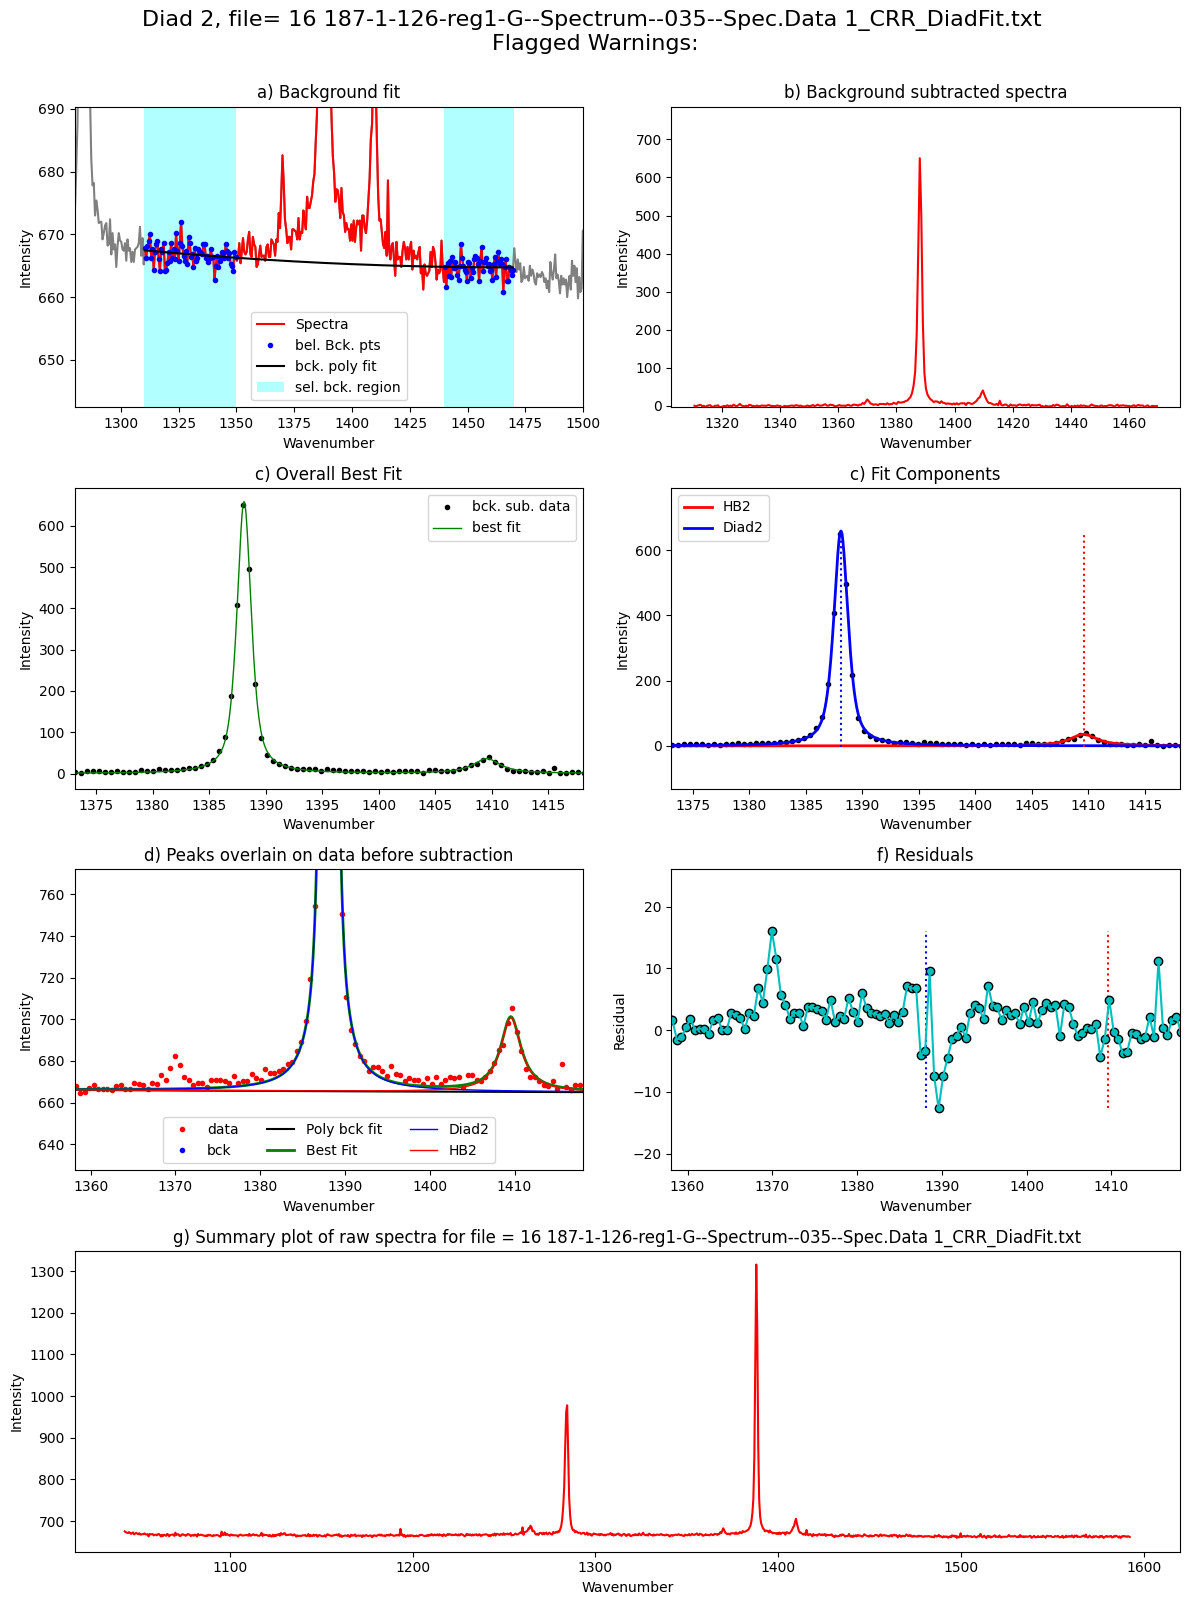

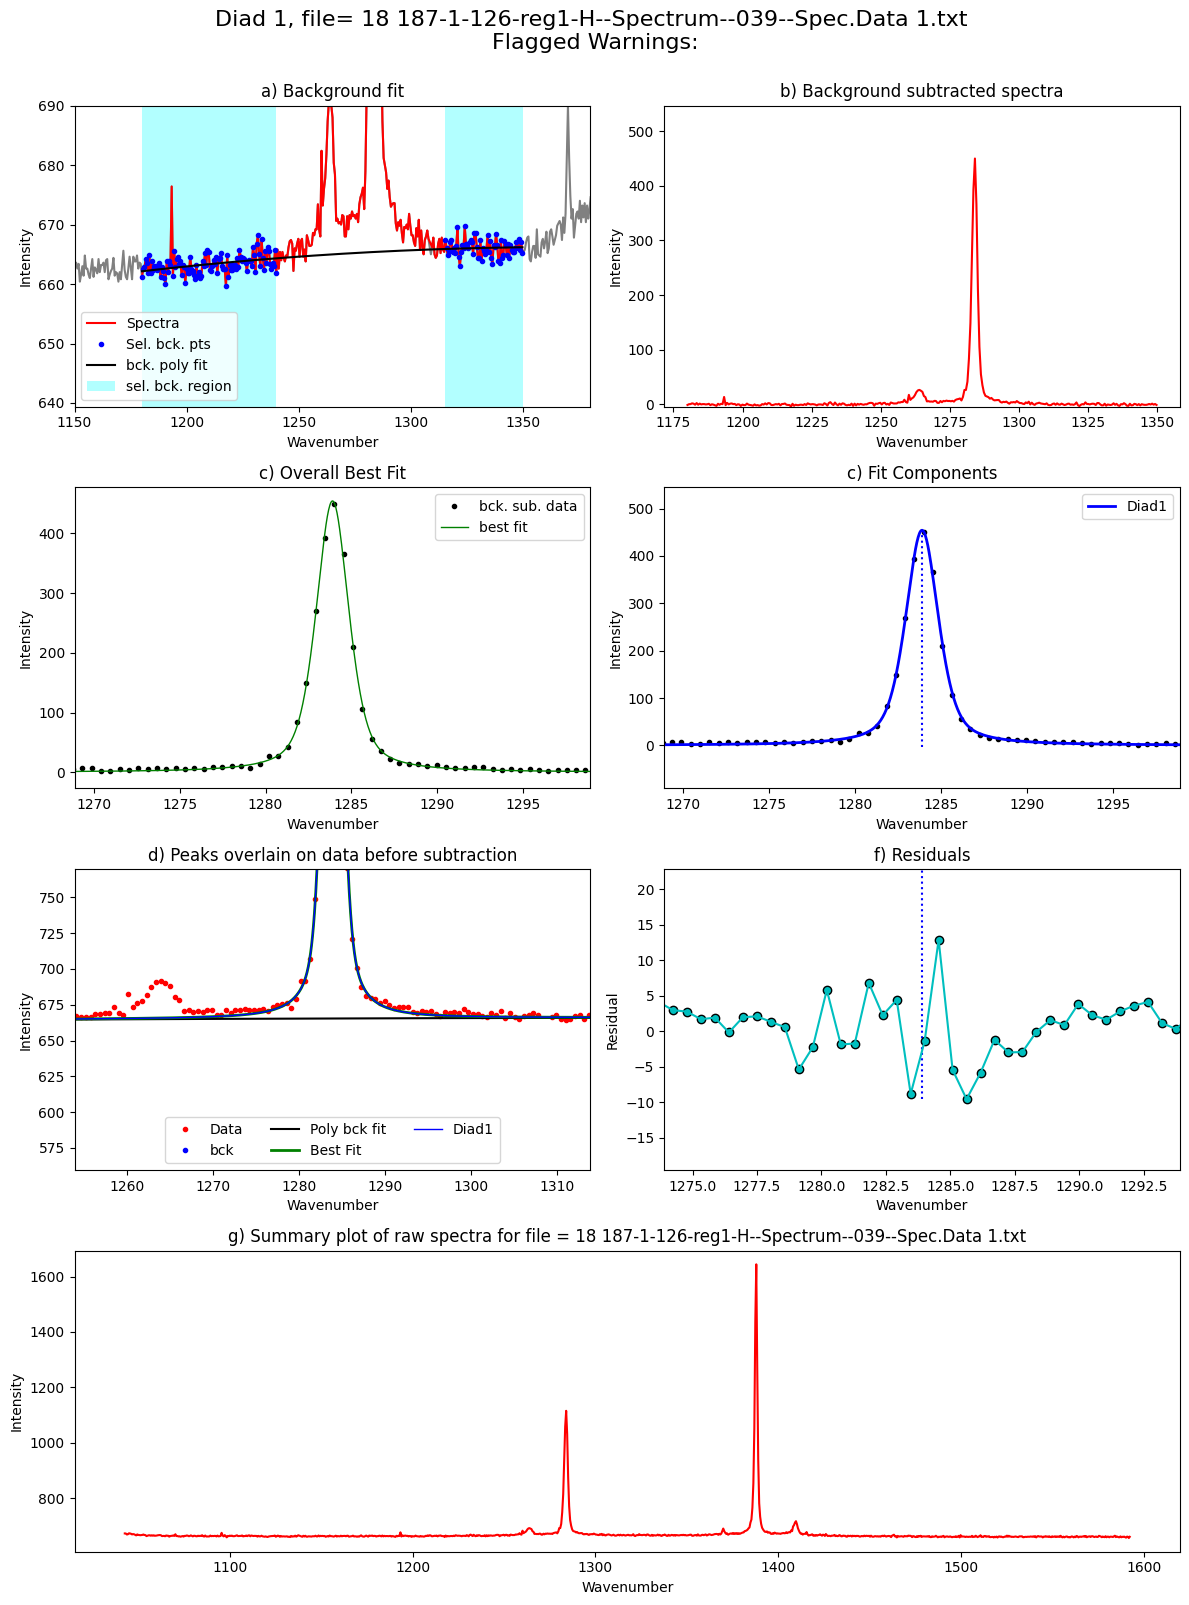

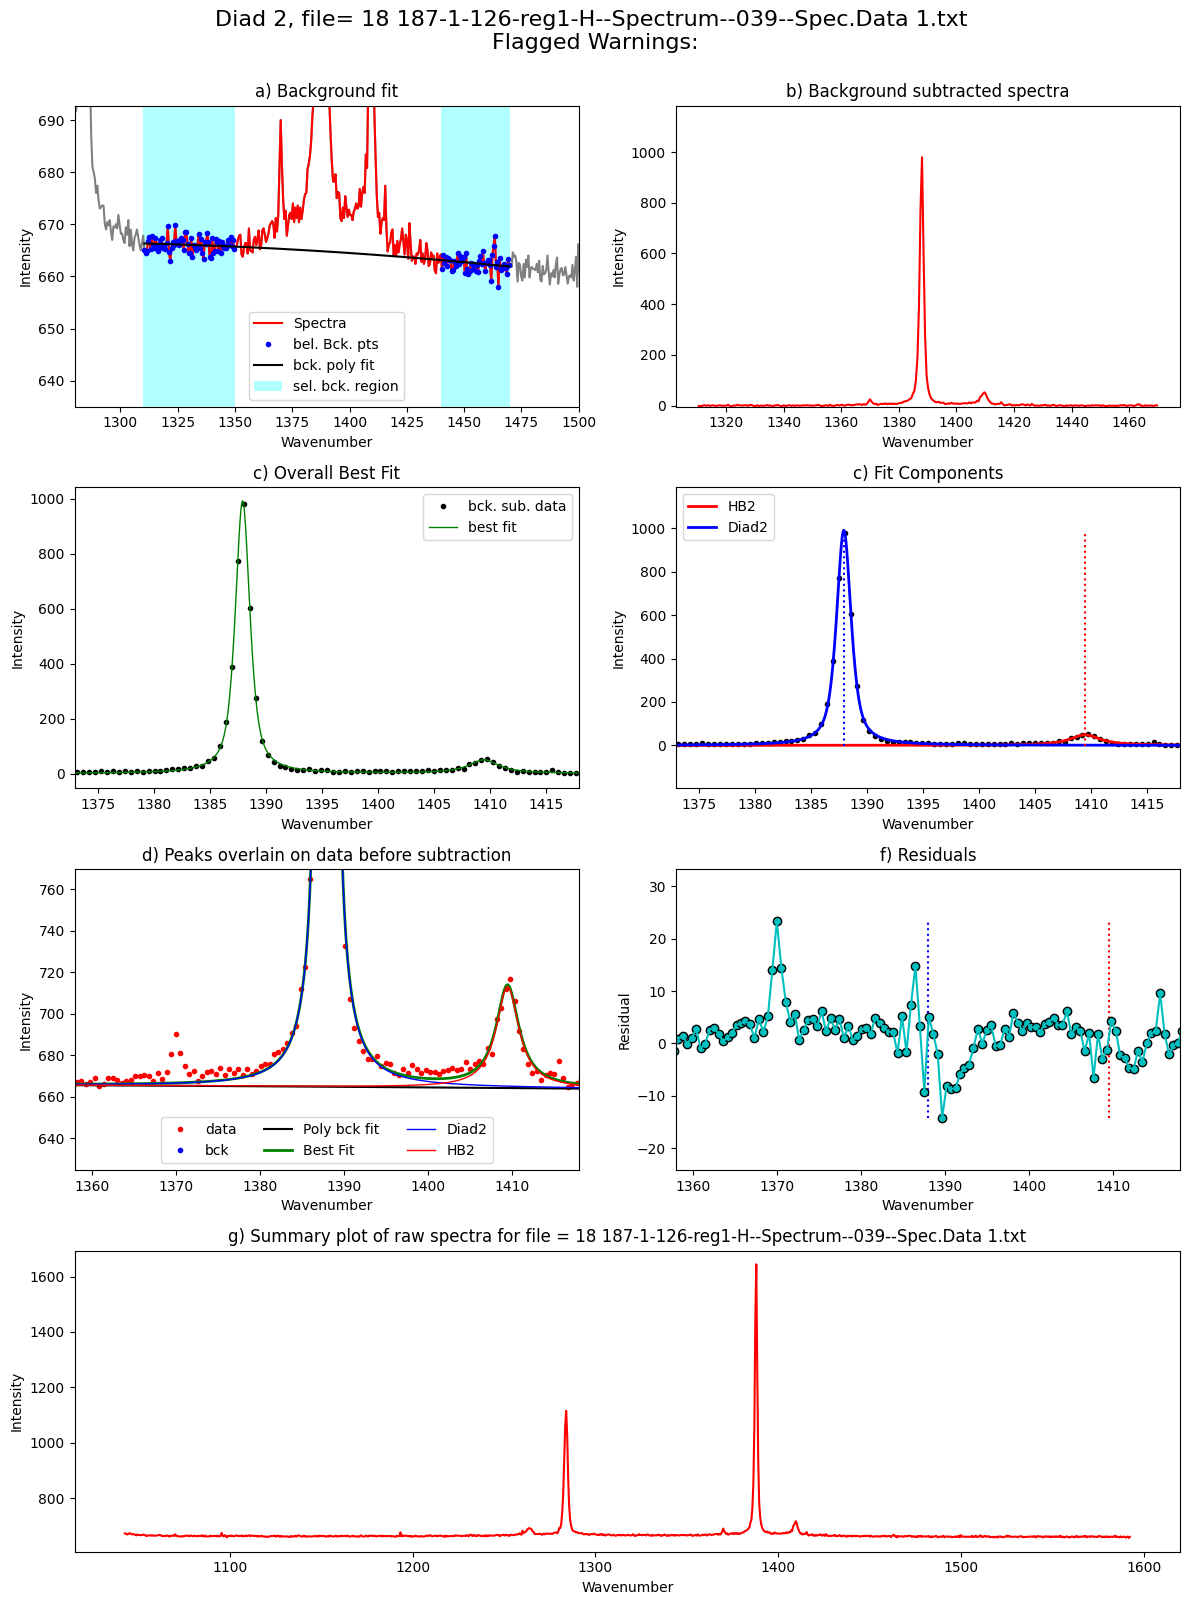

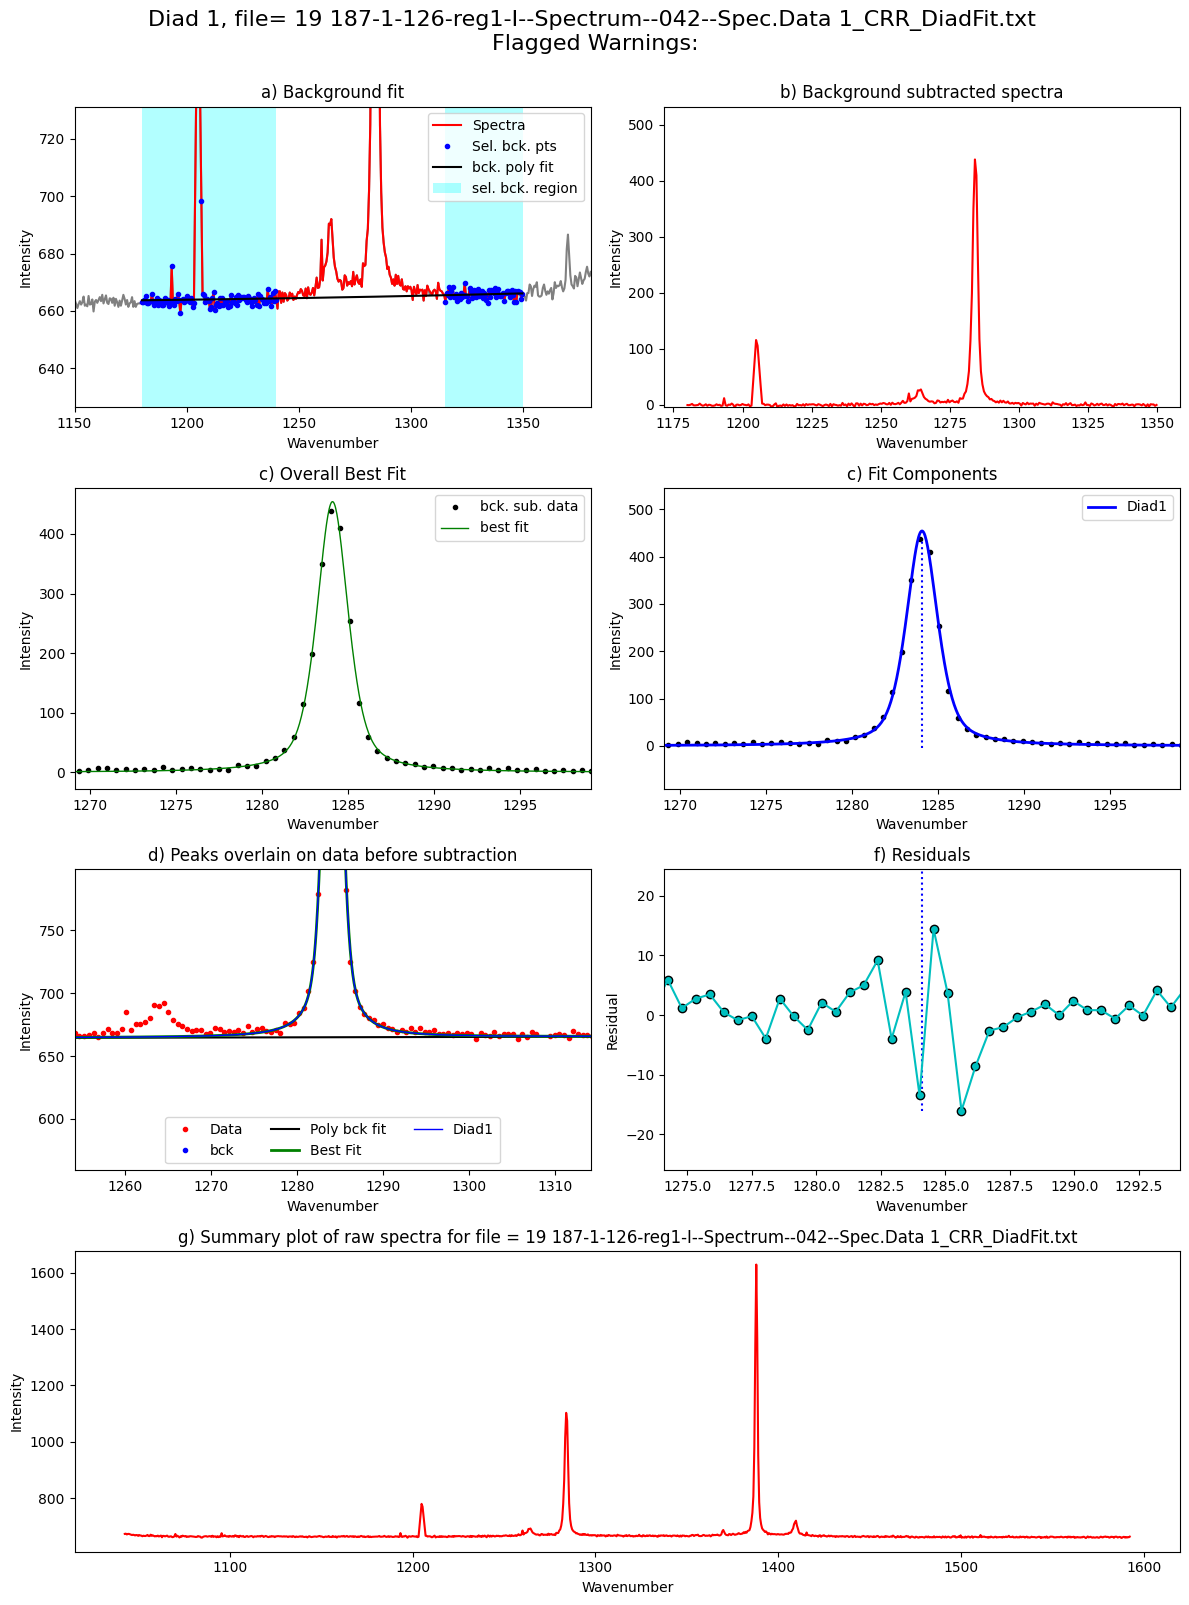

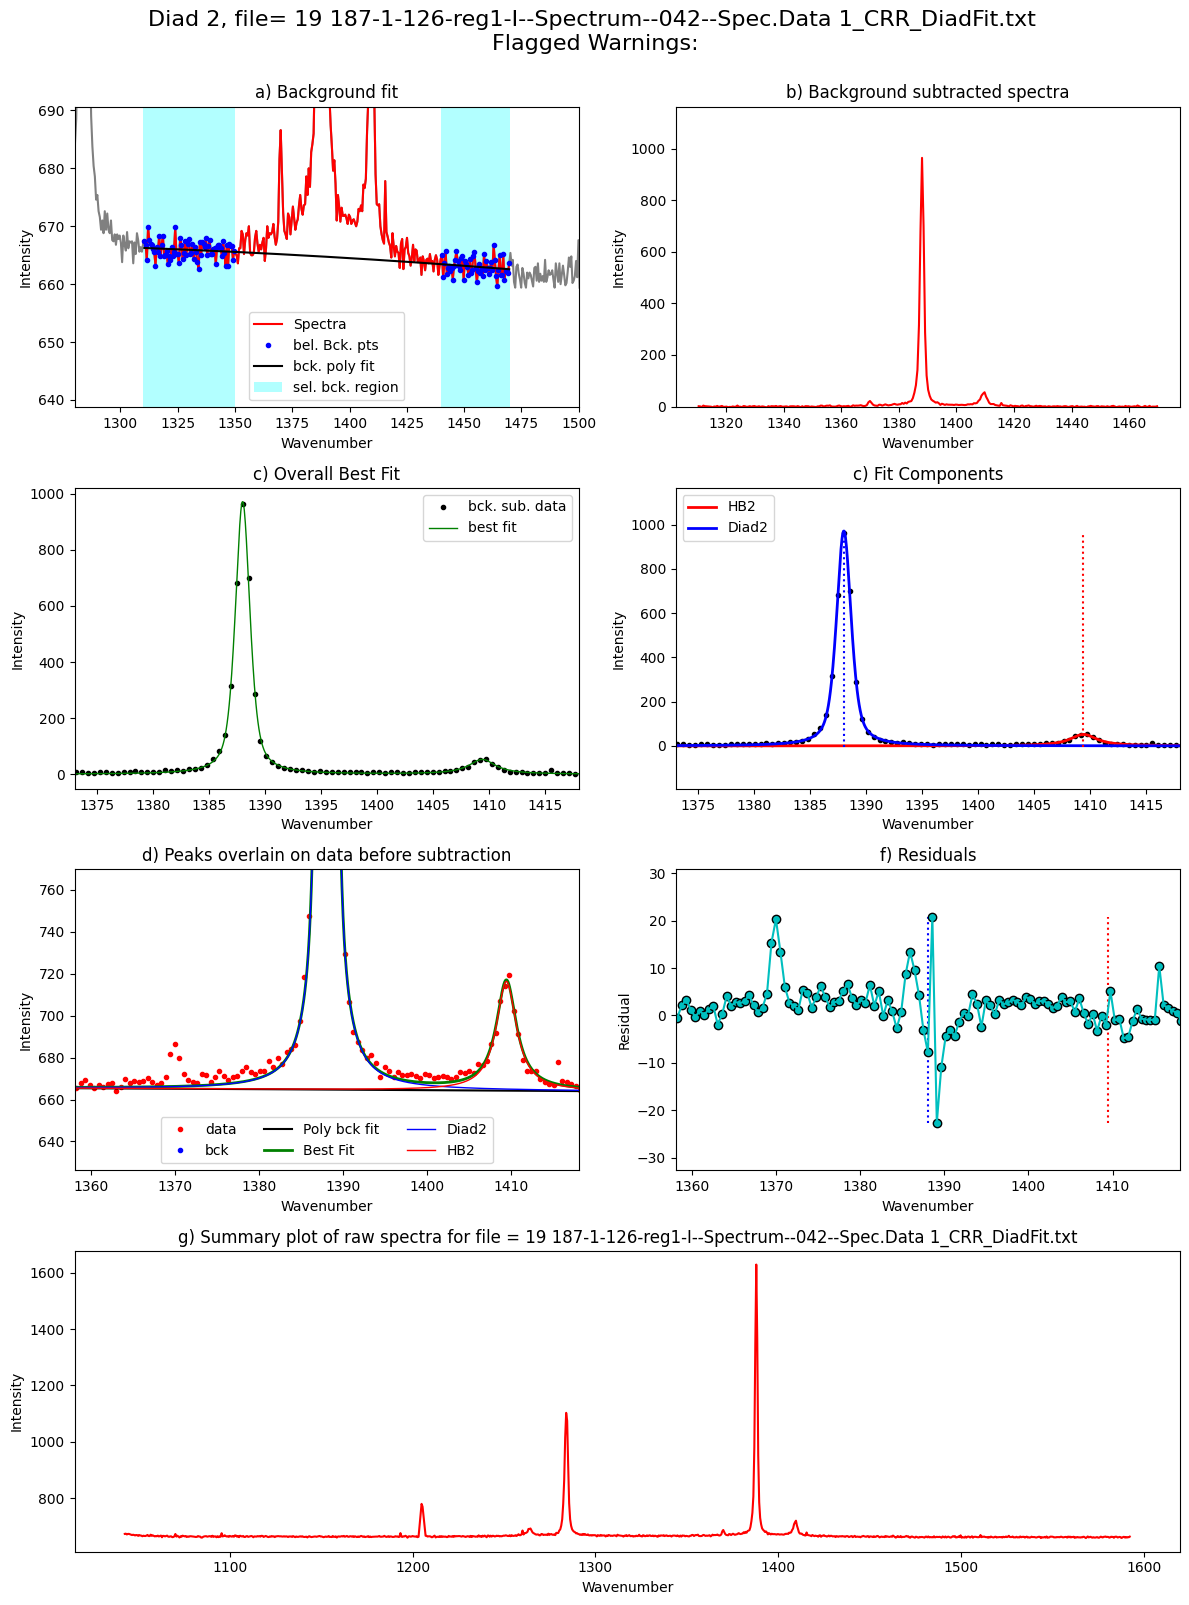

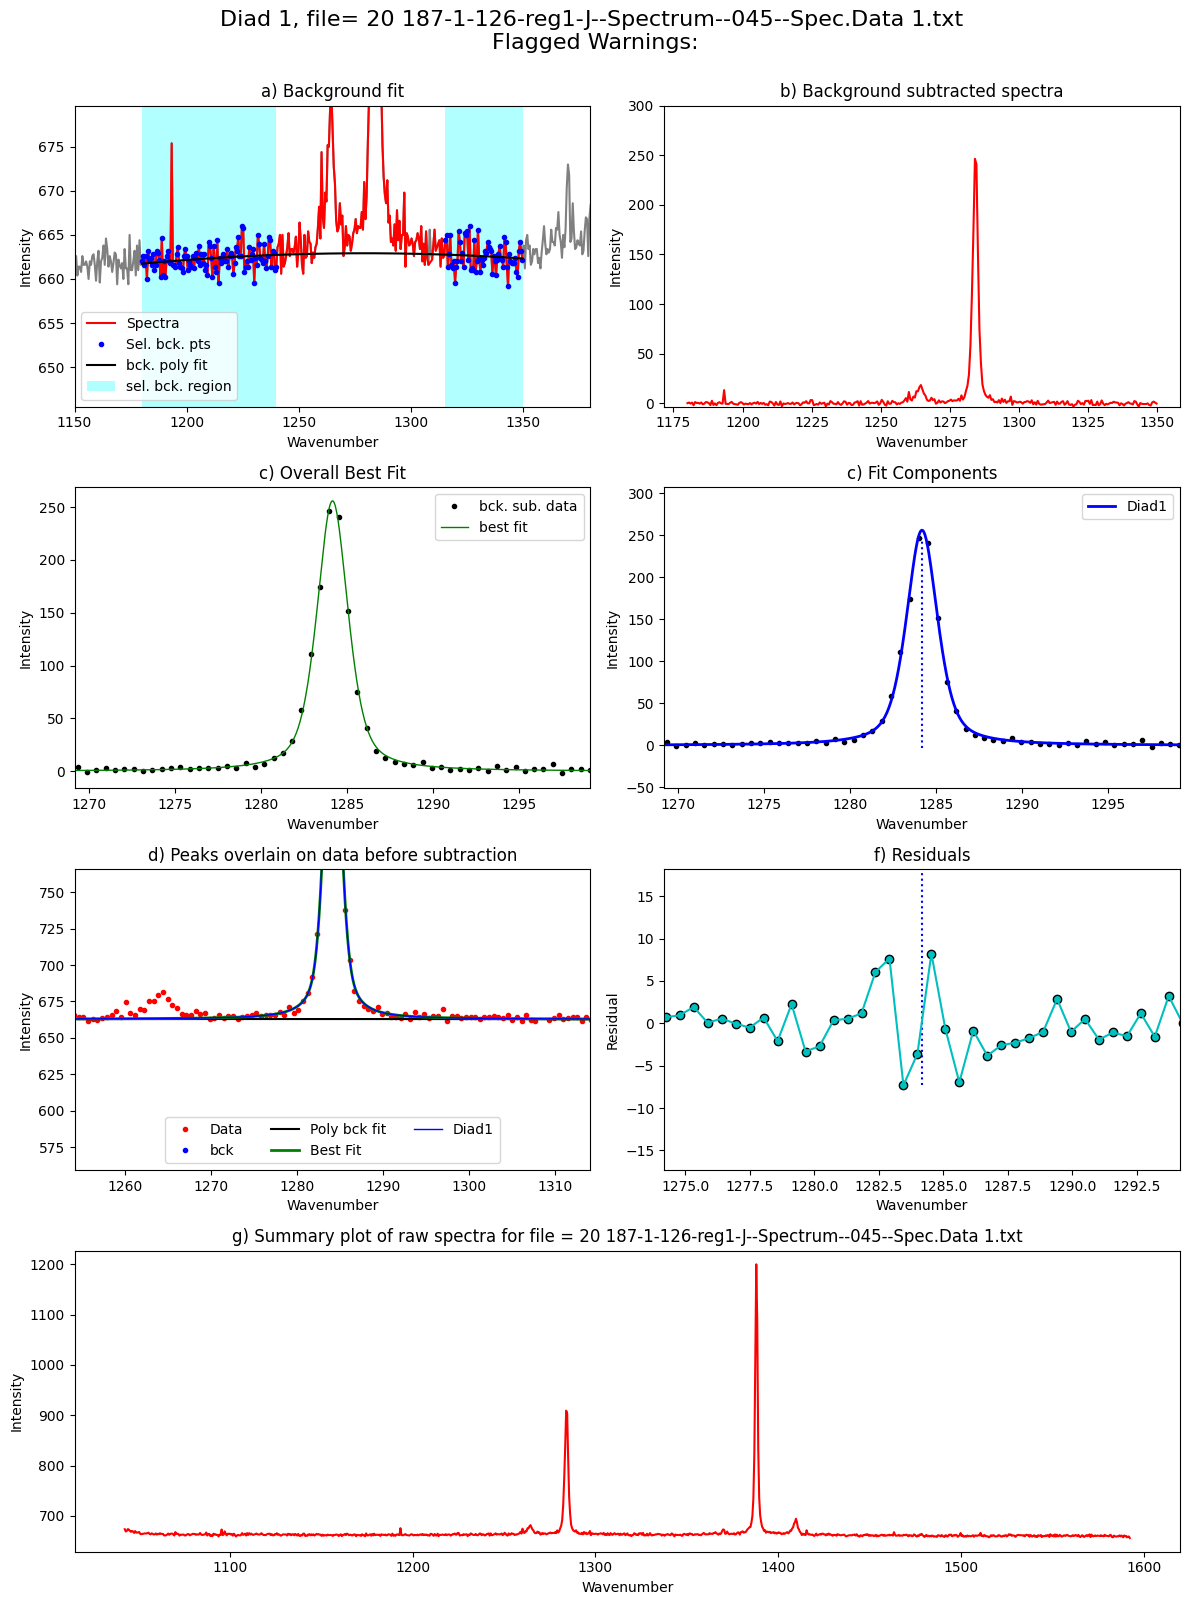

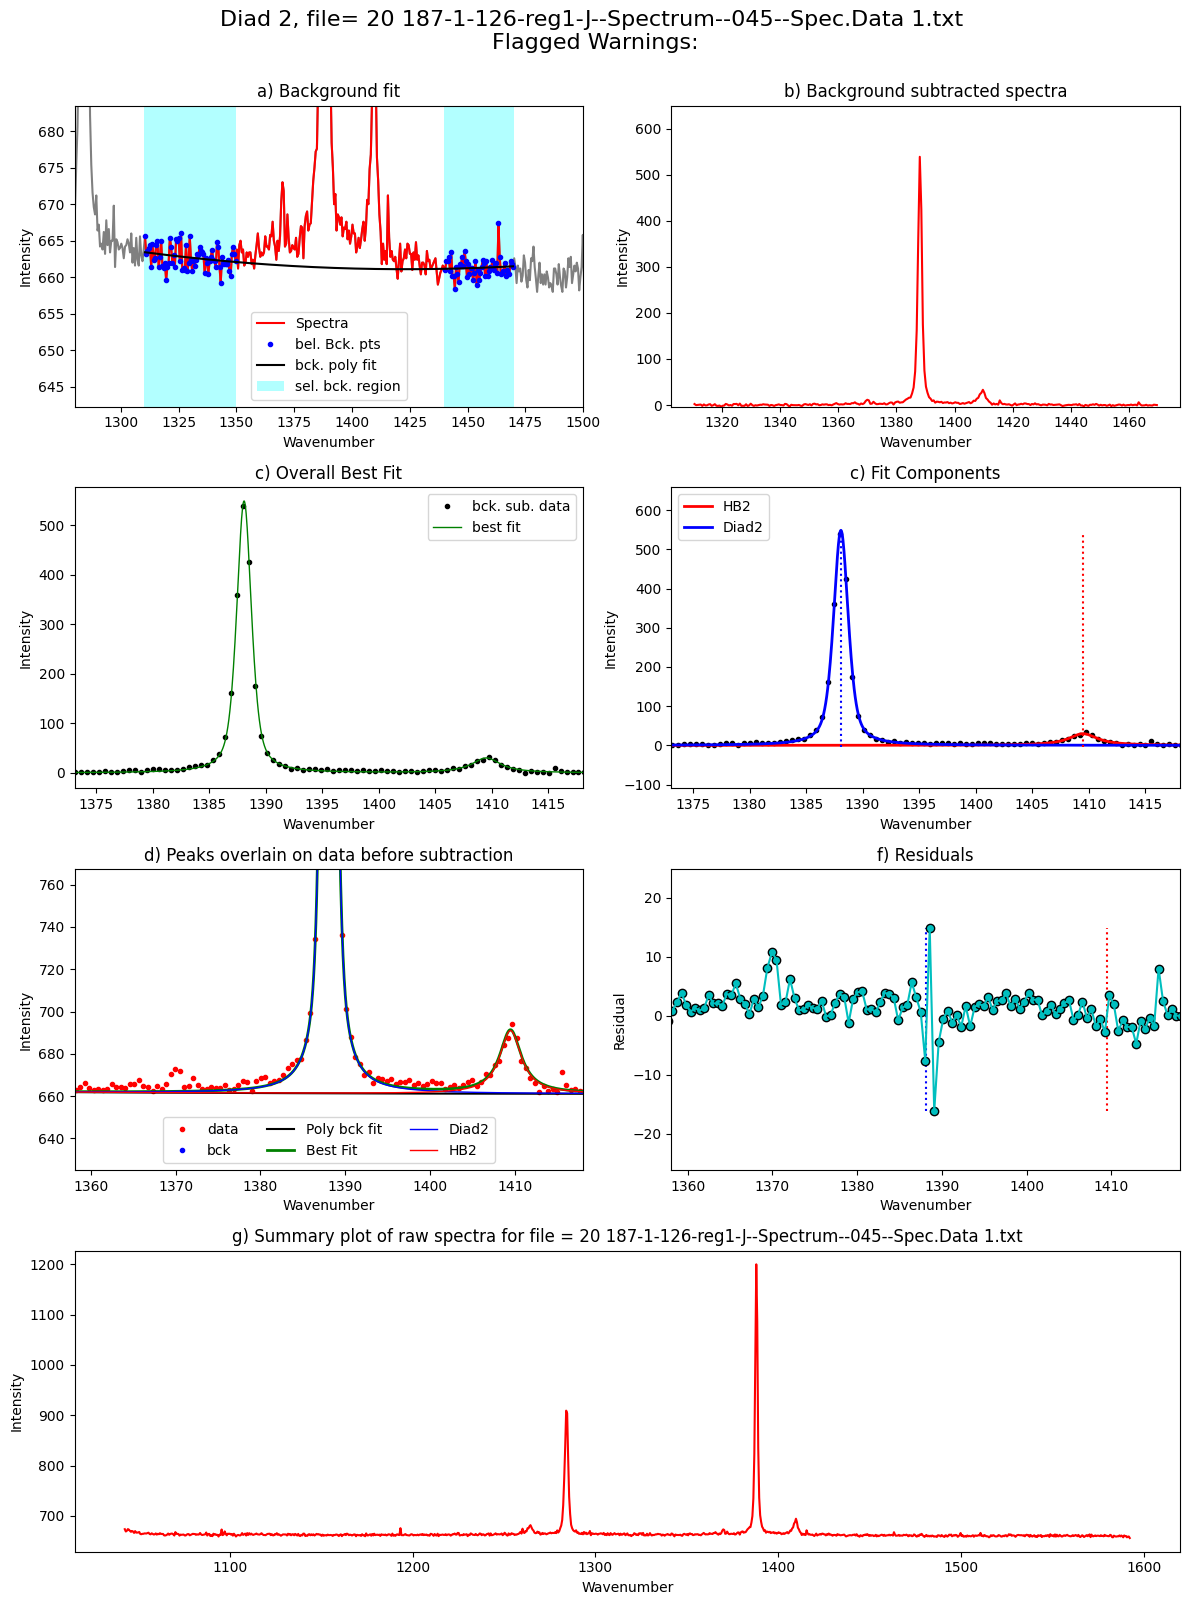

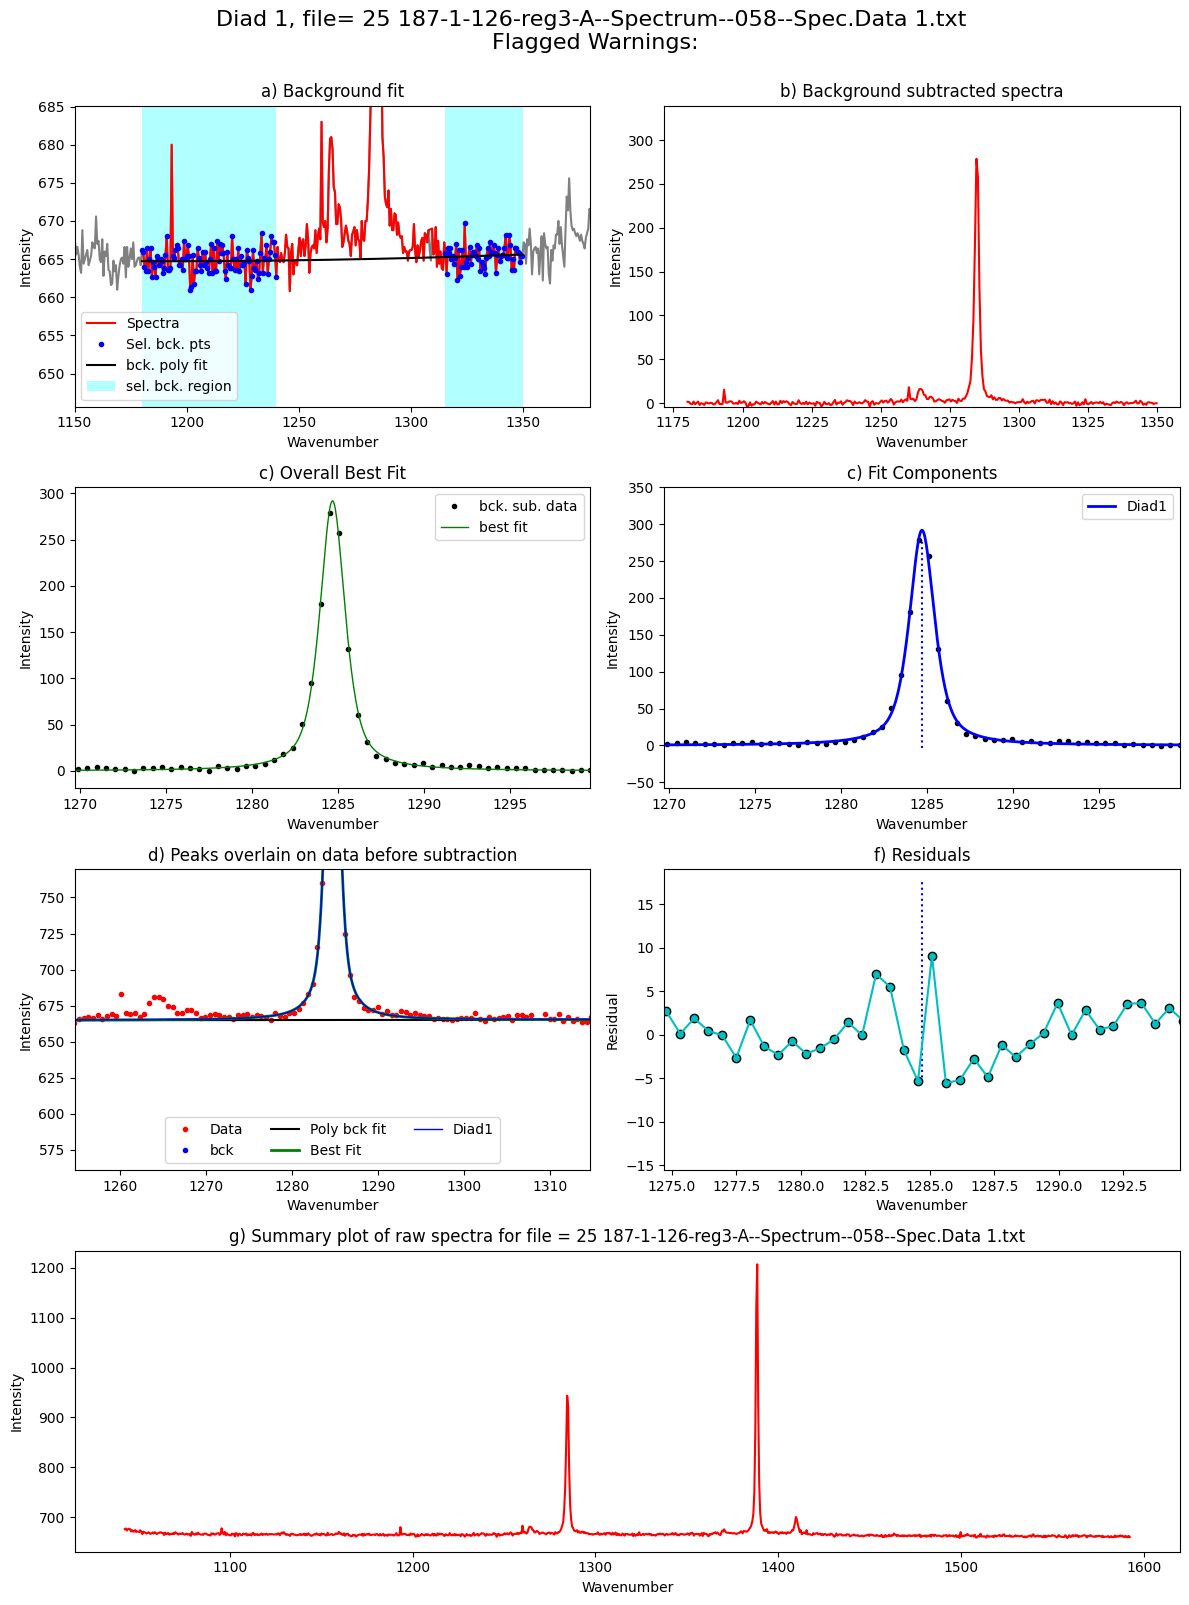

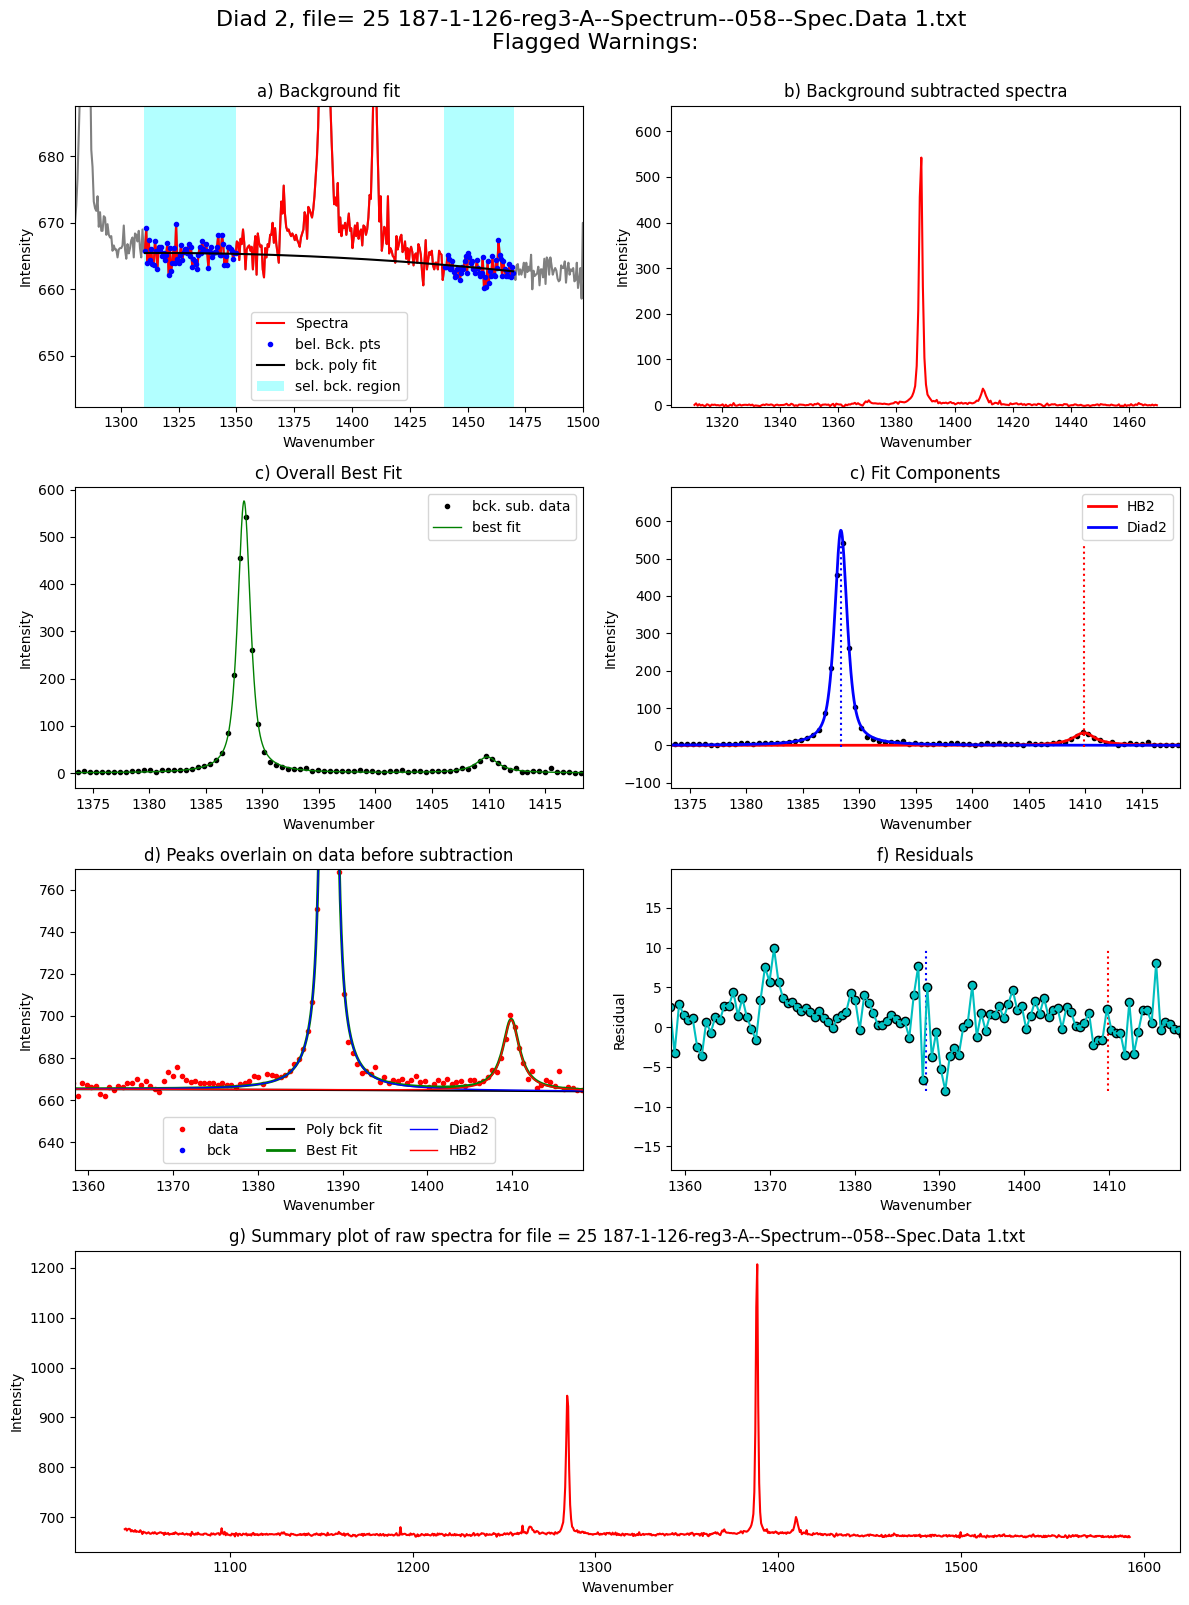

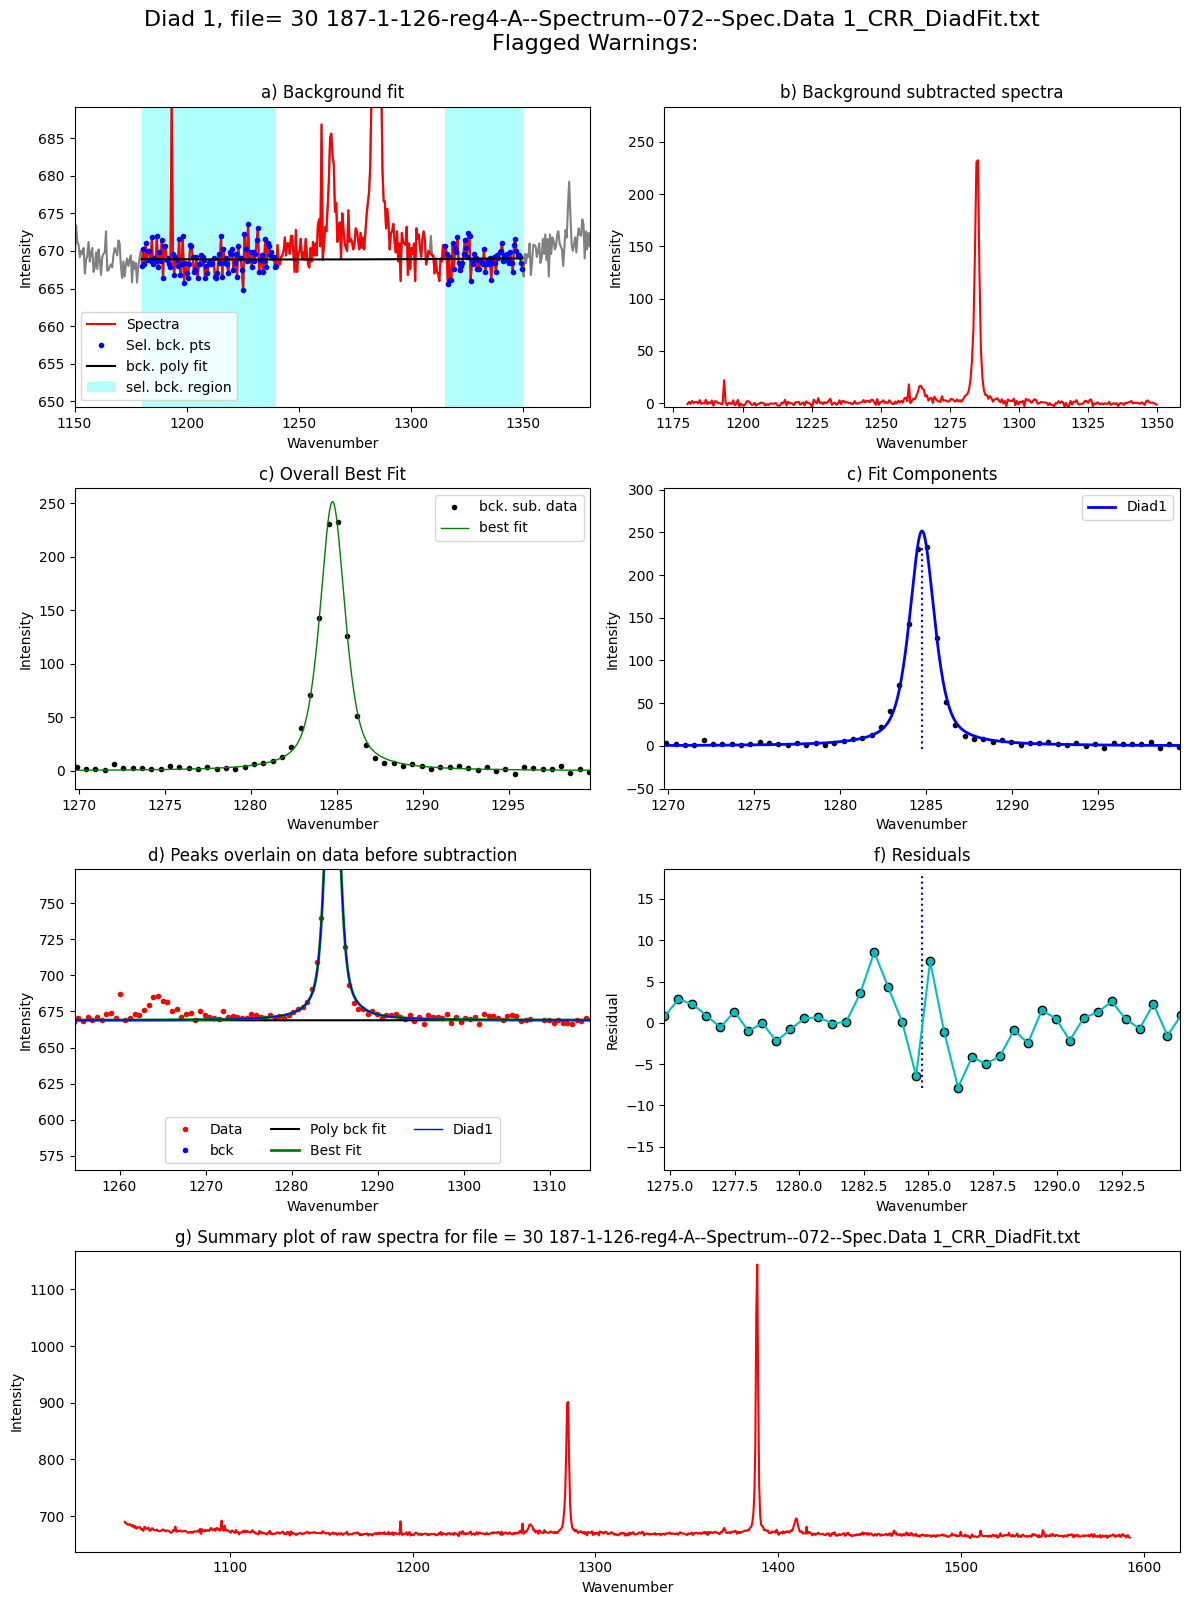

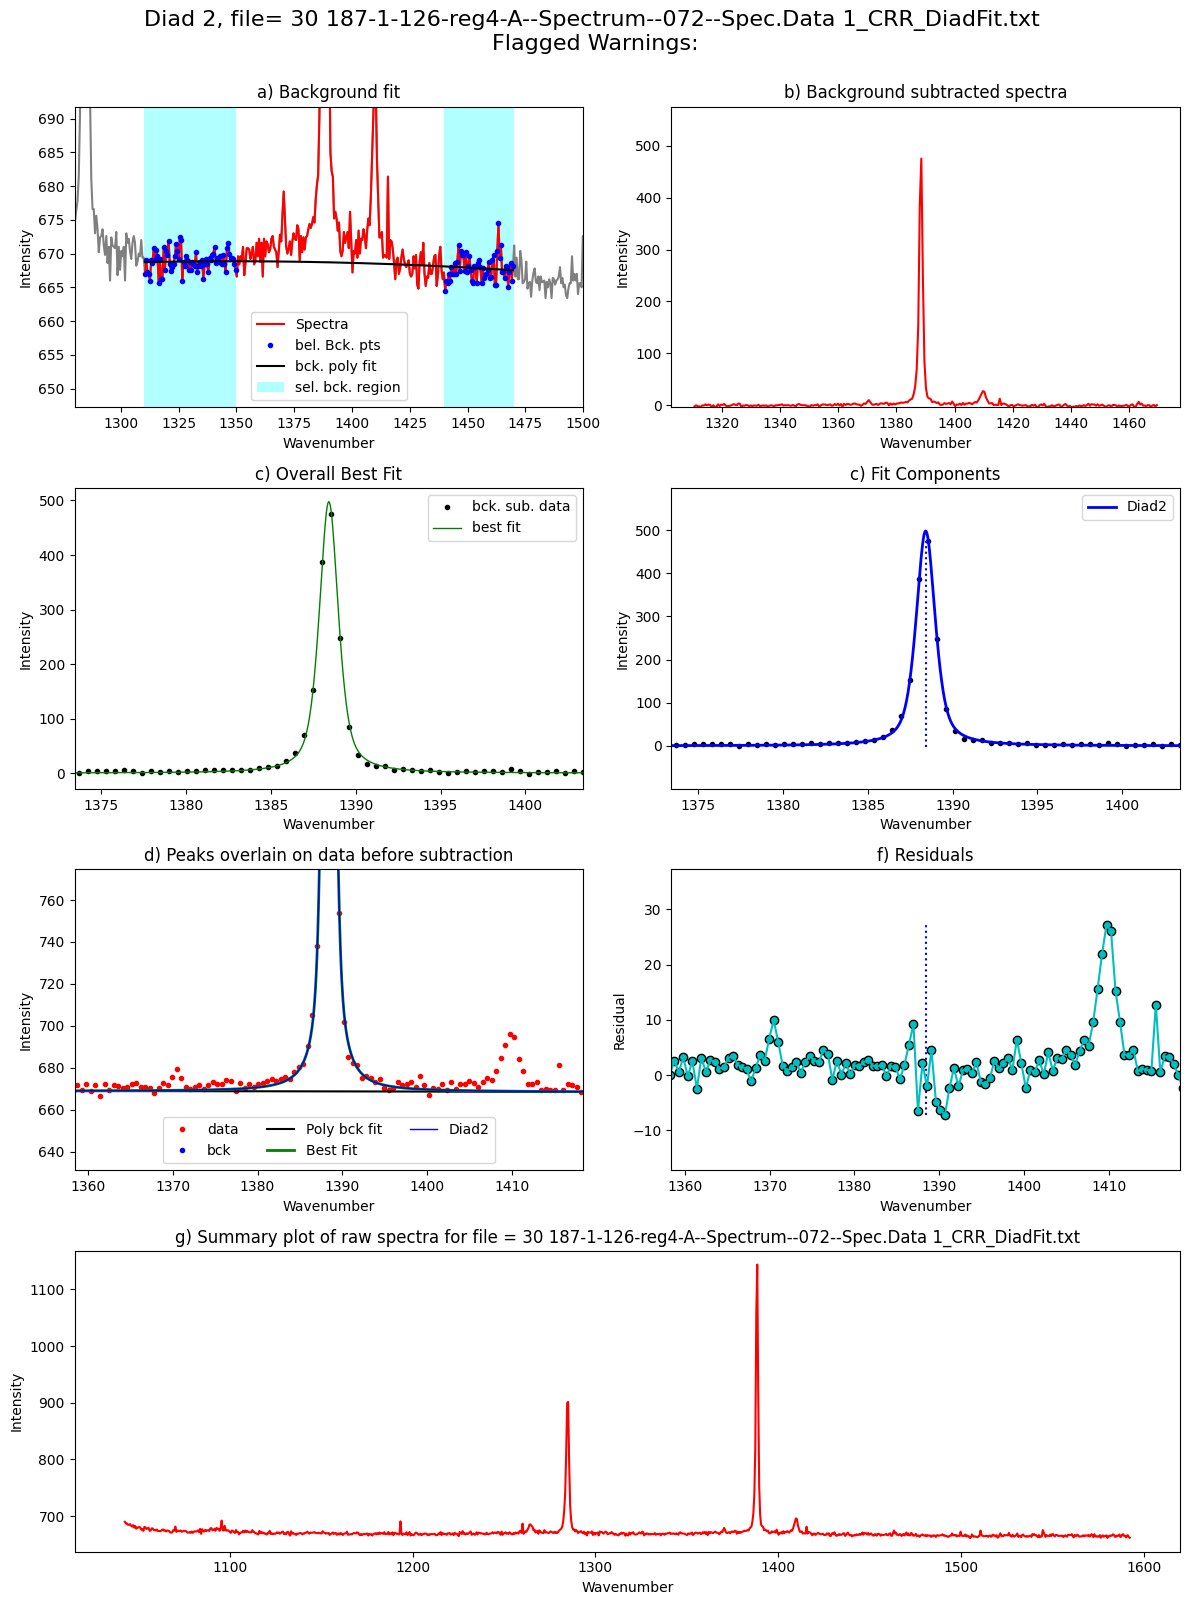

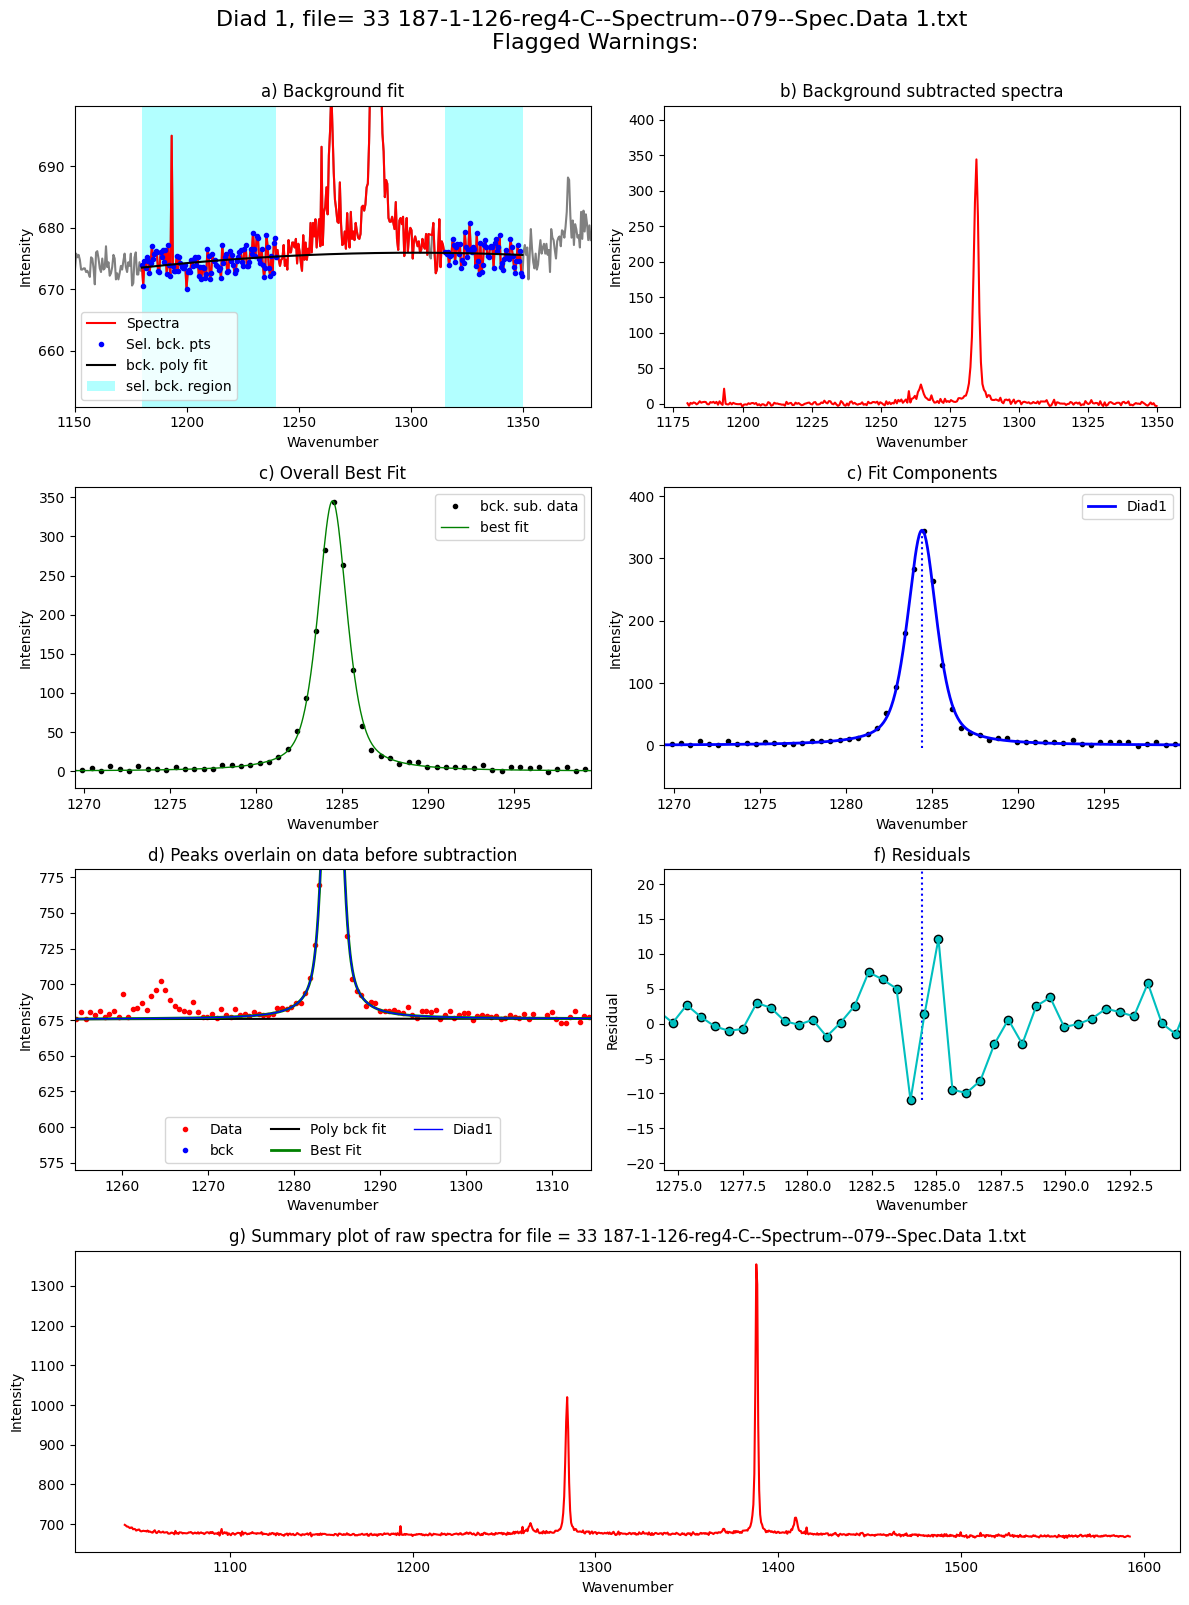

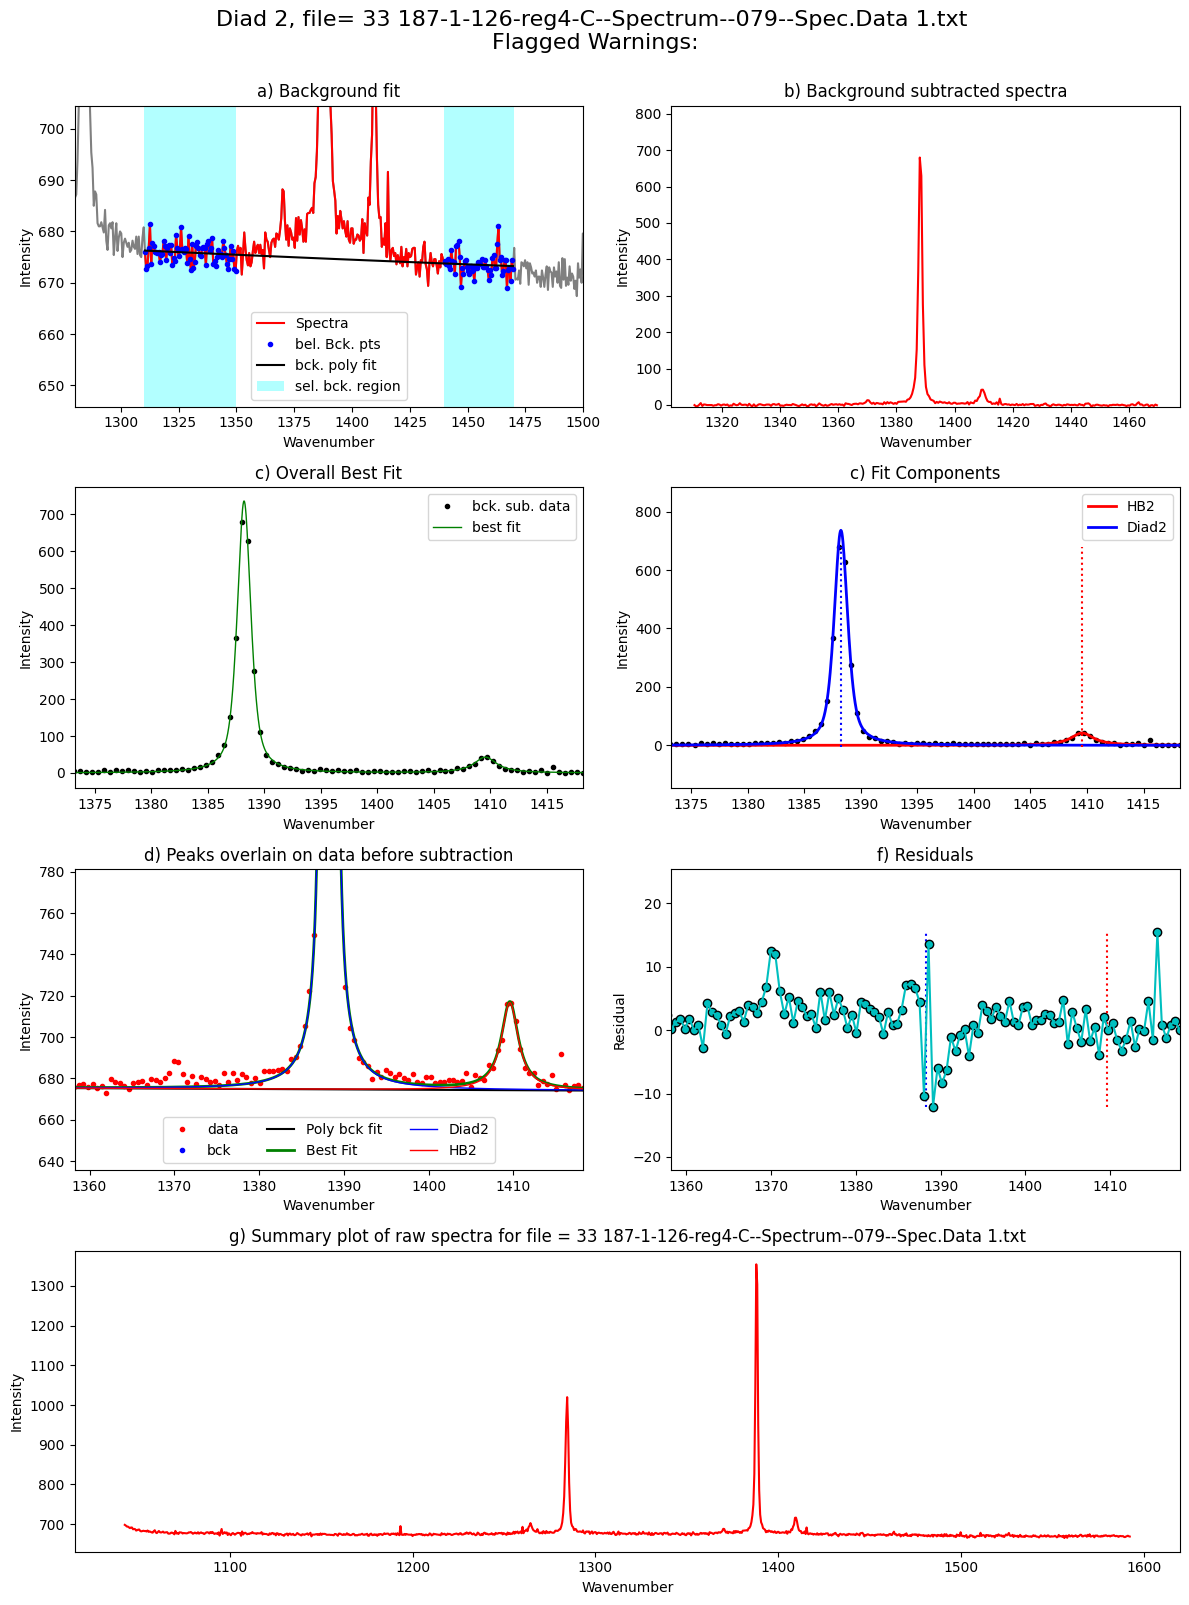

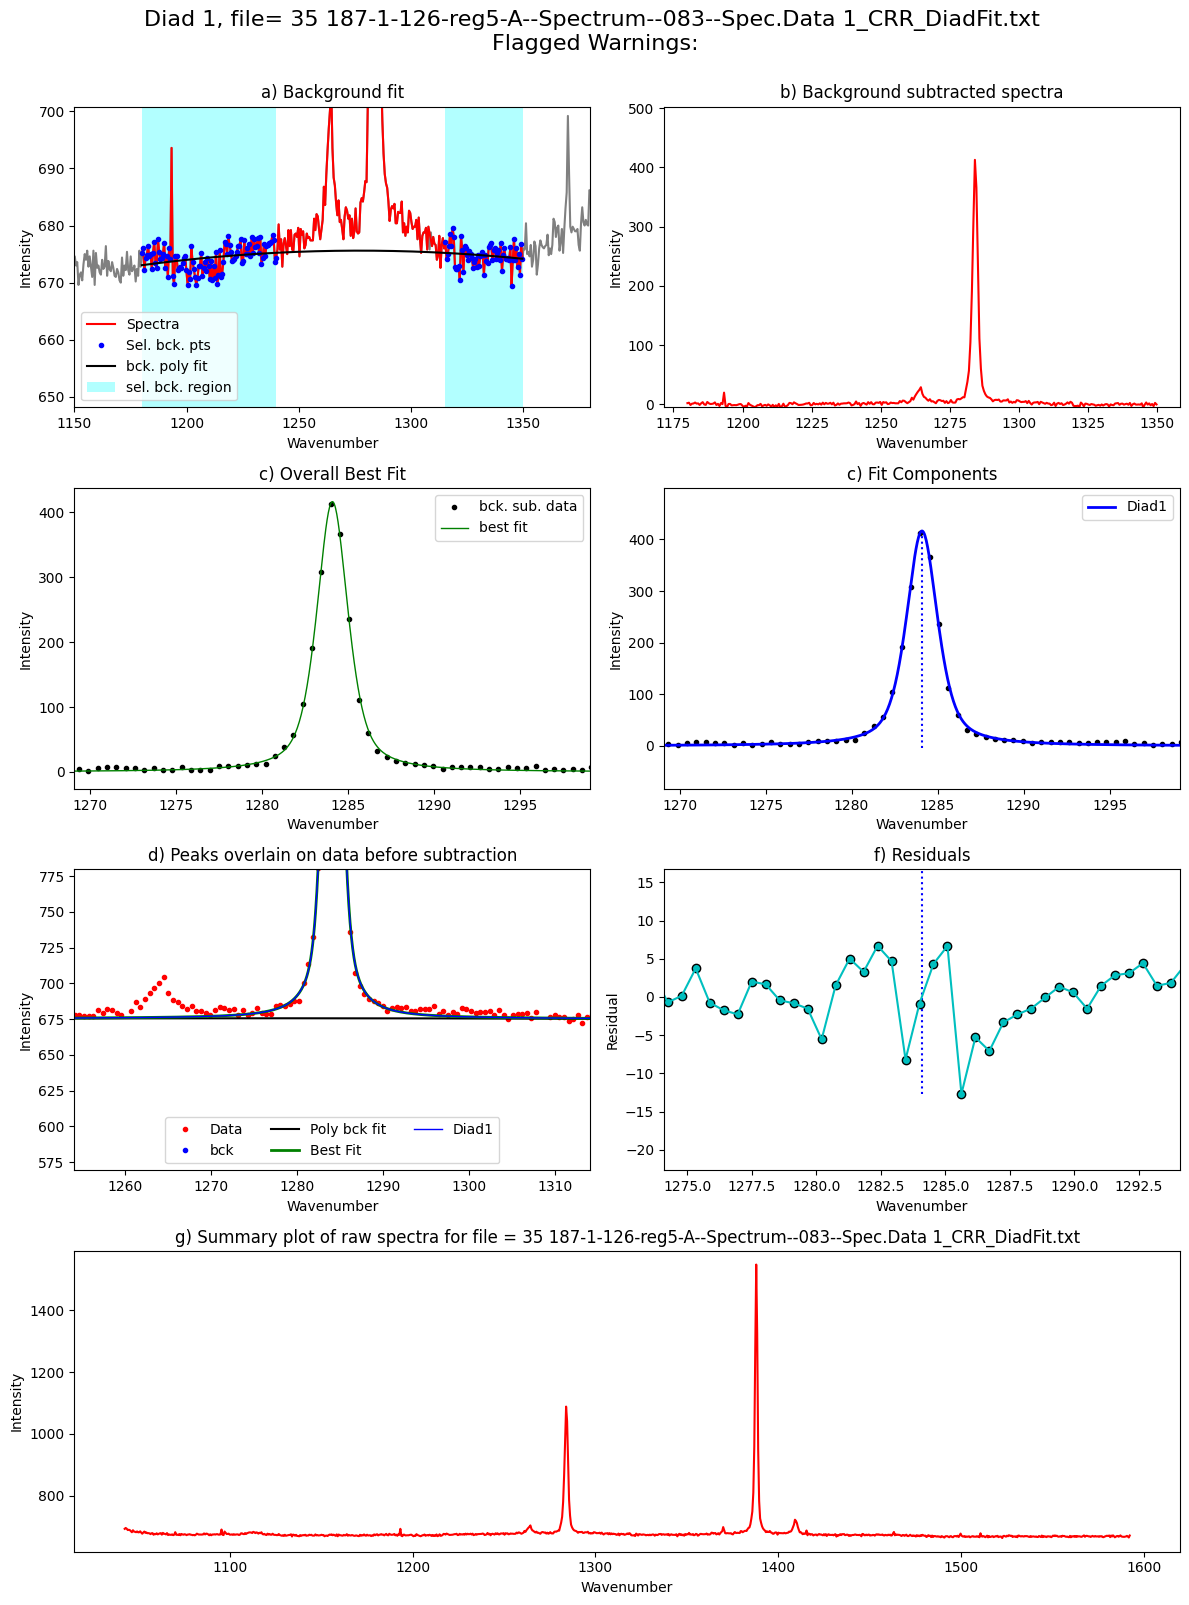

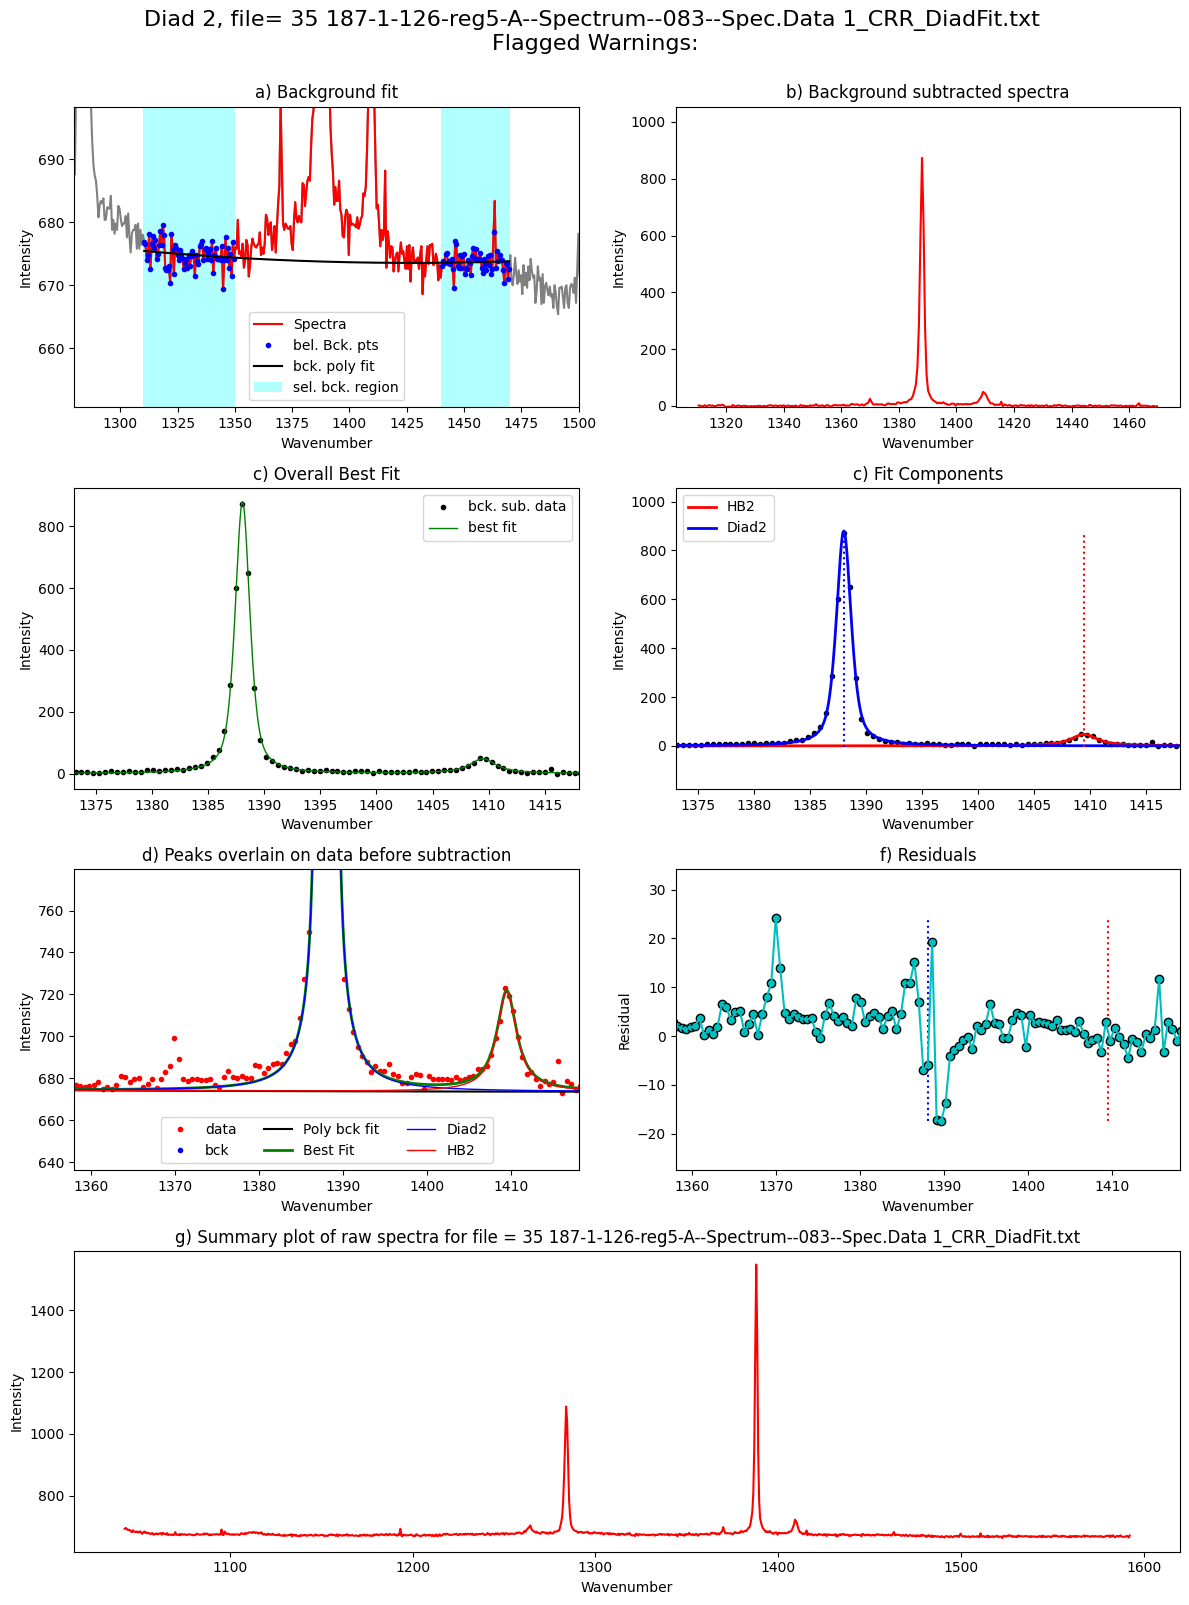

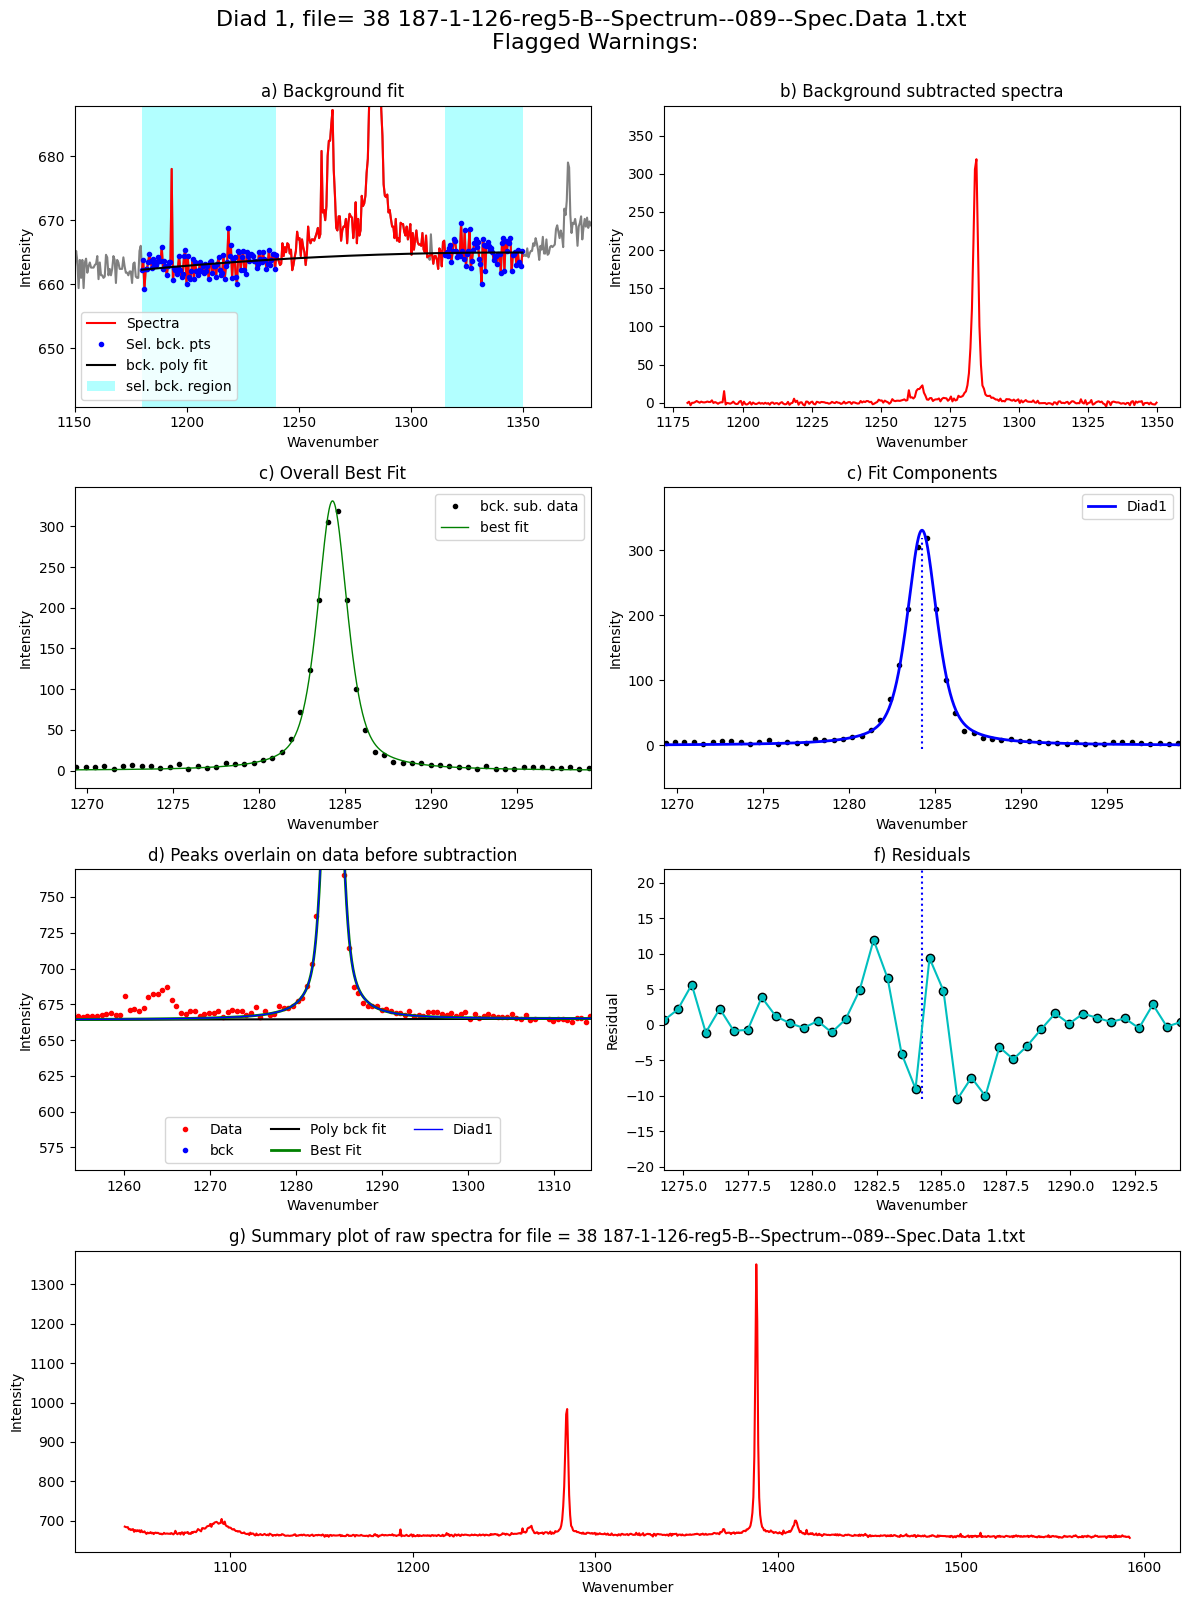

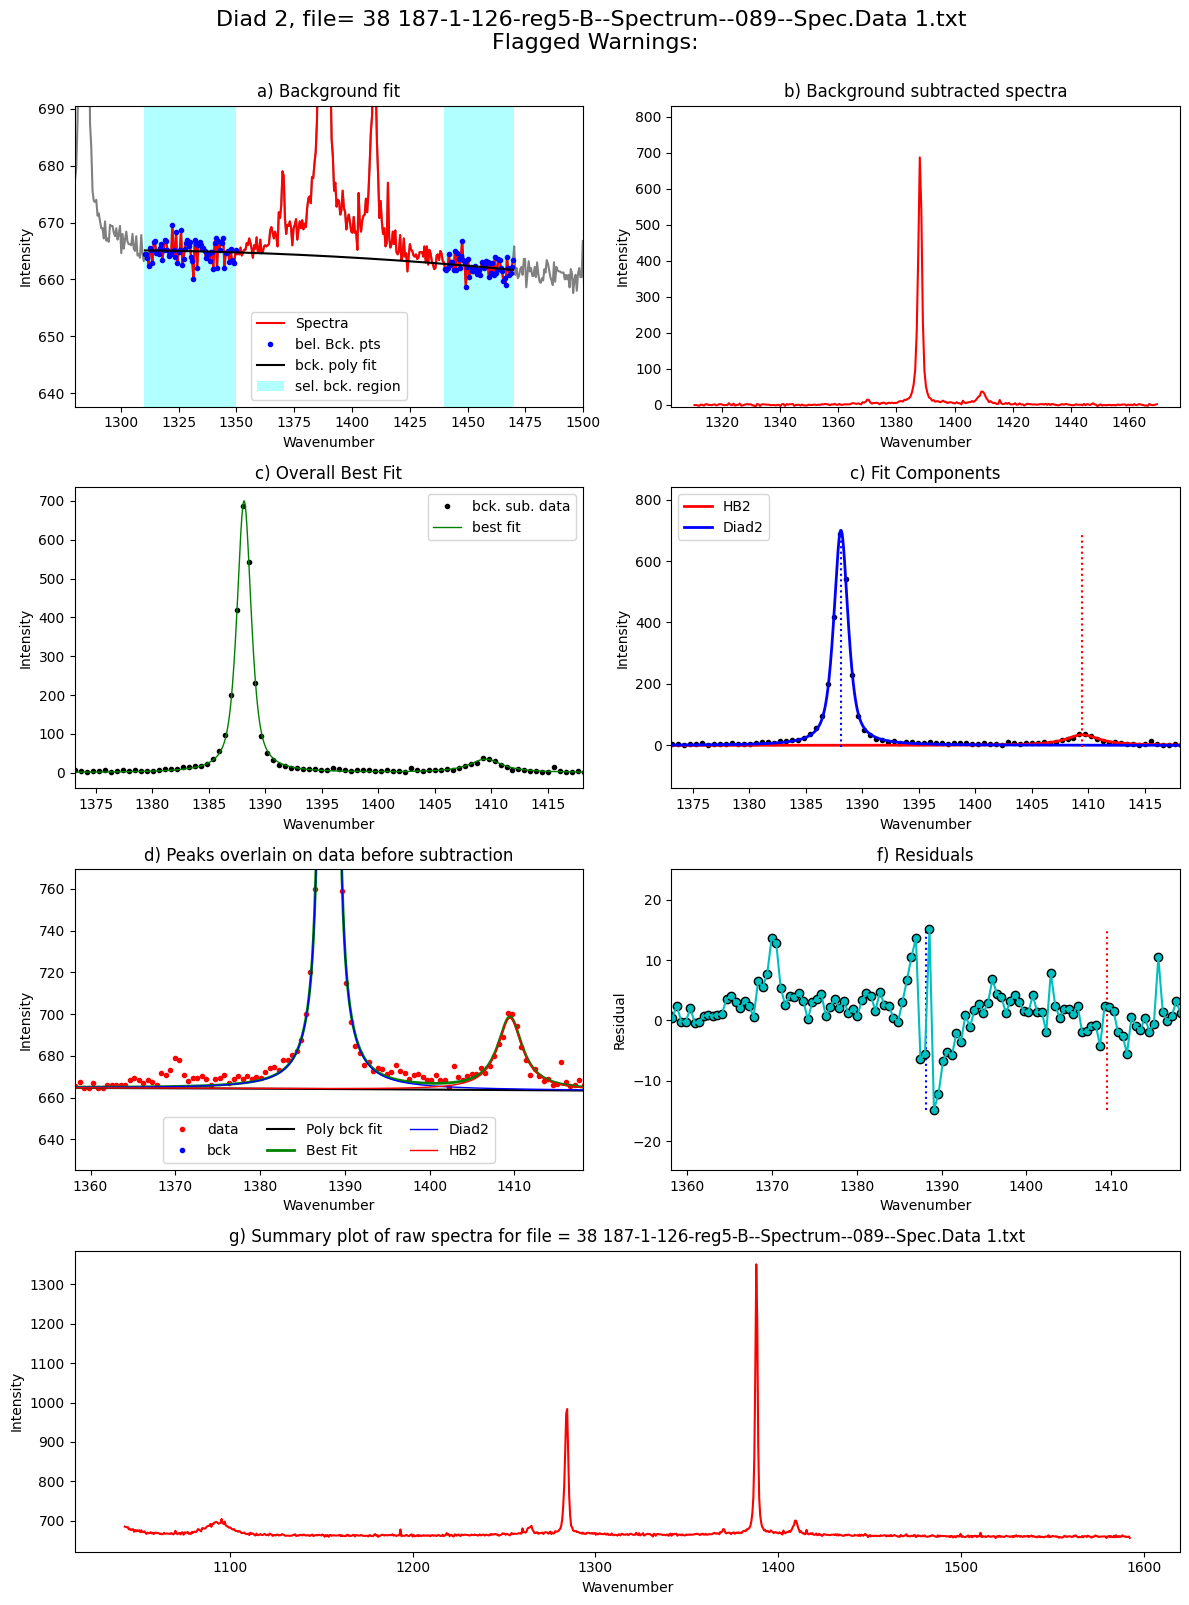

In [31]:
from tqdm import tqdm
plot_figure=True# If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=spectra_filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config_init.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config_init.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=spectra_filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


In [32]:
# Save parameters to excel
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)
if batch=='Std':
    combo.to_excel('Std_Diads.xlsx', index=False)

In [33]:
combo

filename   Splitting   Split_σ  \
0   187-1-126-reg1-A--Spectrum--015--Spec.Data 1_C...  103.932927  0.011512   
1        187-1-126-reg1-E--Spectrum--028--Spec.Data 1  103.926128  0.008335   
2        187-1-126-reg1-F--Spectrum--031--Spec.Data 1  103.963277  0.008769   
3   187-1-126-reg1-G--Spectrum--035--Spec.Data 1_C...  103.862564  0.009014   
4        187-1-126-reg1-H--Spectrum--039--Spec.Data 1  104.024585  0.008340   
5   187-1-126-reg1-I--Spectrum--042--Spec.Data 1_C...  103.934851  0.018335   
6        187-1-126-reg1-J--Spectrum--045--Spec.Data 1  103.907908  0.009676   
7        187-1-126-reg3-A--Spectrum--058--Spec.Data 1  103.677122  0.008124   
8   187-1-126-reg4-A--Spectrum--072--Spec.Data 1_C...  103.644191  0.010495   
9        187-1-126-reg4-C--Spectrum--079--Spec.Data 1  103.782513  0.009483   
10  187-1-126-reg5-A--Spectrum--083--Spec.Data 1_C...  103.951185  0.009044   
11       187-1-126-reg5-B--Spectrum--089--Spec.Data 1  103.865369  0.009663   

    Diad1_Combofit_Cent  Diad1_cent_err  Diad1_Combofit_Height  \
0           1284.091192        0.009973             280.486419   
1           1284.087346        0.007903             463.291167   
2           1284.036225        0.008338             389.704372   
3           1284.233466        0.008491             321.175837   
4           1283.896294        0.007988             454.329475   
5           1284.093266        0.018158             454.099398   
6           1284.176952        0.009143             255.813920   
7           1284.696148        0.007749             291.920971   
8           1284.767117        0.009299             251.600356   
9           1284.444318        0.009086             345.325641   
10          1284.094636        0.008486             416.530720   
11          1284.249850        0.009163             331.210531   

    Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  Diad1_Residual  \
0        1284.091192        816.464586           1.057231        2.828347   
1        1284.087346       1348.831451           1.080931        3.941566   
2        1284.036225       1122.635452           1.086437        3.467041   
3        1284.233466        882.306925           1.023765        2.798563   
4        1283.896294       1369.673216           1.133621        3.755689   
5        1284.093266       1308.498216           1.078895        3.685386   
6        1284.176952        730.283443           1.071886        2.388952   
7        1284.696148        718.117834           0.877930        2.631955   
8        1284.767117        598.997712           0.865601        2.565607   
9        1284.444318        929.185004           0.997392        3.348302   
10       1284.094636       1224.512759           1.078826        3.882881   
11       1284.249850        939.250281           1.034288        3.338194   

    ...  Diad1_Asym50  Diad1_Asym70 Diad1_Yuan2017_sym_factor  \
0   ...      1.147458      1.142163                  0.311794   
1   ...      1.133333      1.135773                  0.288248   
2   ...      1.156406      1.150121                  0.339851   
3   ...      1.341699      1.321727                  0.699638   
4   ...      1.159744      1.144509                  0.362179   
5   ...      1.137874      1.191595                  0.297503   
6   ...      1.188908      1.216418                  0.404976   
7   ...      1.120408      1.166667                  0.211420   
8   ...      1.172269      1.200913                  0.298232   
9   ...      1.212963      1.234332                  0.424815   
10  ...      1.004658      1.088681                  0.010051   
11  ...      1.201439      1.264668                  0.416692   

    Diad1_Remigi2021_BSF  Diad2_Asym50  Diad2_Asym70  \
0               0.007539      1.034335      1.081123   
1               0.004666      1.048352      1.088710   
2               0.005576      1.062500      1.107843   
3               0.006375      1.033860      1.036918   
4               0.004990      

### This plays a sound when the notebook is done if you have a tendency to procrastinate

In [34]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step3 Fit All")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step3 Fitall is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()